# Table of Contents
0. Imporing Libraries
1. Data Preparation
2. Data Cleaning
3. Analyzing the Text
4. Assessing Clusters on Educational Platforms
5. MIE1624 Course Redesign
Curriculum Design
6. Emphasis in Analytics Course Selector

**Notebook Summary**
This notebook imports and cleans job posting data from indeed and linkedin (web scraping performed in separate notebooks). Top skills are extracted from the cleaned text and clustered.

Similarly, course descriptions from top universities are imported and cleaned. The courses are evaluated against the job skill clusters, and the best course to match each cluster determined.

A new Masters program curriculum was made based on the matchup between the courses and the clusters representing the skills in-demand by jobs.

A redesign of MIE1624 course was completed by evaluating how each course satisfies the skill requirements of each job. The highest performing courses are general as they rank highest for the most number of jobs. The top courses were reviewed and key elements incorporated in the MIE1624 curriculum.

Finally, a tool was developed to assist students with picking courses from the UofT engineering emphasis in analytics electives, by extracting the skills from an indeed job posting and matching it to skills found in elective courses.

This notebook is intended to be followed in conjuction with the final report for complete explanations of decisions made regarding program curriculum development.

# READ ME

Read Me
Dowload the following files (from the project_final folder)on your system and then upload to this notebook to run the code

1. Coursera
2. Courses at Berkley (1)
3. Courses at Rotman (1)
4. Indeed2
5. lang_low
6. languages
7. Linkedin
8. stop_words
9. company_stop_words
10. skills
11. UofT Emphasis in Analytics - Elective Courses
12. MIE1624
13. NEW MIE1624

# Importing Libraries

In [1]:
!pip install -U pip
!pip install -U dill
!pip install -U nltk==3.4  

import pandas as pd
import numpy as np

import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import matplotlib.gridspec as gridspec
from IPython.display import Markdown, display
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

import os

import re

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

import html

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
!pip install --upgrade xgboost
from xgboost import XGBClassifier

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

import scipy.cluster.hierarchy as shc

import codecs
from sklearn import feature_extraction
!pip install mpld3
import mpld3
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from scipy.cluster.hierarchy import ward, dendrogram



     |████████████████████████████████| 1.4MB 1.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Requirement already up-to-date: dill in /usr/local/lib/python3.6/dist-packages (0.3.1.1)
     |████████████████████████████████| 1.4 MB 1.3 MB/s 
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436381 sha256=c5a165eddf86d7e9627ab899b1064643dc9474c4b59f644c2f641ce2704a646b
  Stored in directory: /root/.cache/pip/wheels/82/65/d5/eb94274f37176d3907fcf972069738a40e760c92049d59f07d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


     |████████████████████████████████| 109.7 MB 6.9 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 788 kB 1.4 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116678 sha256=26a0f85d0d9783dfeefbfc67f48f6490cb12267575d2d771956755d35cb6081c
  Stored in directory: /root/.cache/pip/wheels/c0/74/c9/ac92f0c4c9eb137d440e86c2822aba0b96b63e608dd5737164
Successfully built mpld3


In [0]:
def remove_url(text):

    """
    APPLICATION OF THE FUNCTION:
        Input a text to remove URLs from
    
    PARAMETERS:
        - text = text to clean
    
    RETURN:
        - cleaned text
    """ 
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    
    return text

In [0]:
def lowercase(text):
    text = text.lower()
    return text

In [0]:
def remove_punctuation(tokenized_text):

    """
    APPLICATION OF THE FUNCTION:
        Input a text to convert to lower case and remove punctuation
    
    PARAMETERS:
        - text = text to clean
    
    RETURN:
        - cleaned text
    """    
    to_remove = string.punctuation + '\n'
    
    text = detokenize(tokenized_text)    
    text  = "".join([char for char in text if char not in to_remove]) #removing punctuation marks
    text = re.sub('[0-9]+', '', text) #replacing all numbers by a ''
#     text = re.sub(r'@[A-Za-z0-9]+','',text)
#     text = re.sub(r'_[A-Za-z0-9]+','',text)
#     text = re.sub(r'&[A-Za-z0-9]+','',text)
#     text = re.sub(r'http[A-Za-z0-9]+','',text)
    text = tokenize(text)
    
    return text

In [0]:
string.punctuation
to_remove = string.punctuation + '\n'
# to_remove = '!"$%&()*,./:;<=>?[\\]^_`{|}~-'

In [0]:
def remove_commas(text):
    text = text.replace(",", "")
    return text

In [0]:
def delete_non_ascii(text):
    
    """
    APPLICATION OF THE FUNCTION:
        Input a text to delete all the non acsii characters like 'â€¦''
    
    PARAMETERS:
        - text = text to clean
    
    RETURN:
        - cleaned text
    """    
    
    text = ''.join(c for c in text if ord(c) < 128)
    
    return text

In [0]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(tokenised_text):
    lemmatized_text = [wn.lemmatize(word) for word in tokenised_text]
    return lemmatized_text


stemmer = SnowballStemmer("english")

def stemming(tokenised_text):
    stemmed_text = [stemmer.stem(word) for word in tokenised_text]
    return stemmed_text

In [0]:
def remove_stop_words_v2(tokenised_text):

    """
    APPLICATION OF THE FUNCTION:
        Input a text to remove stop words like a, an, the etc
    
    PARAMETERS:
        - text = text to clean
    
    RETURN:
        - cleaned text
    """    
#     s1 = ' '
#     tokenizer = RegexpTokenizer(r'\w+')         
#     tokenised_text = tokenizer.tokenize(text)
    stopword = nltk.corpus.stopwords.words('english')
    stopword.extend(['ur', 'yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'yearold', 'fu', 
                     'week','day'])
    stopword.extend(extra_stop_words)
    stopword.extend(company_stop_words_list)
    stopword = list(set(stopword))
        
    words_rmStop = [word for word in tokenised_text if word not in stopword] # remove stop words
#     text_no_stop_words = s1.join(words_rmStop)
    
    return words_rmStop
    

In [0]:
def detokenize(tokenised_text):
    
    s1 = ' '
    text_detokenised = s1.join(tokenised_text)
    
    return text_detokenised

In [0]:
tokenizer = RegexpTokenizer(r'\w+')         

def tokenize(text):
#     text_tokenized = tokenizer.tokenize(text)
    text_tokenized = text.split(' ')
    return text_tokenized

In [0]:
def filter_skill_vocab(full_ngrams, final_list_skills_cleaned):
    b_list = list()
    for x in full_ngrams:
        if x in final_list_skills_cleaned:
            b_list.append(x)          
    return b_list

In [0]:
def replace_words(s, words):
    for k, v in words.items():
        s = s.replace(k, v)
    return s

# 1. DATA PREPARATION

Data from job postings was scraped in separate notebooks. The data was exported to excel documents, which are loaded here for text cleaning. 

A comprehensive list of skills pertaining to data scientist positions, independent of industry, was developed by reviewing job postings, literature, academic sources and literature. The skills list is created here, and later used to perform analysis of the job descriptions and academic courses.

In [0]:
# -----------------------------------------Importing Indeed Jobs DF ---------------------------------#
indeed_df_original = pd.read_excel('Indeed2.xlsx')
indeed_df = indeed_df_original.copy()
# ---------------------------------------------------------------------------------------------------#

# -----------------------------------------Importing Linkedin Jobs DF ---------------------------------#
linkedin_df_original = pd.read_excel('Linkedin.xlsx')
linkedin_df = linkedin_df_original.copy()
# ---------------------------------------------------------------------------------------------------#

# Importing Company Stop Words ----------------------------------------------------------------------#
company_stop_words_original = pd.read_csv('company_stop_words.csv')
company_stop_words = company_stop_words_original.copy()
company_stop_words = company_stop_words.drop(['freq'], axis = 1)
company_stop_words['company_stop_words'] = company_stop_words['company_stop_words'].astype(str)
company_stop_words = company_stop_words['company_stop_words'].apply(lambda x: lowercase(x))
company_stop_words = company_stop_words.apply(lambda x: "".join([char for char in x if char not in to_remove]))
company_stop_words_list = list(set(company_stop_words.to_list()))
# ---------------------------------------------------------------------------------------------------#

# ----------------------------------------------Importing Extra Stop Words ----------------------------#
with open('stop_words.txt', 'r') as f:
     extra_stop_words = f.read().splitlines()
# ---------------------------------------------------------------------------------------------------#

# ----------------------------------------Importing software languages and Skills --------------------#
soft_lang_orginal = pd.read_excel('languages.xlsx')
soft_lang = soft_lang_orginal.copy()
soft_lang = soft_lang['Software Languages'].apply(lambda x: lowercase(x))
soft_lang_list = list(set(soft_lang.to_list()))
# ---------------------------------------------------------------------------------------------------#

# ----------------------------------------------------Importing Skills ----------------------------------#
skills_original = pd.read_csv('skills.csv')
skills = skills_original.copy()
skills = skills['SKILL'].apply(lambda x: lowercase(x))
skills_list = skills.to_list()
skills_list.extend(['unix', 'linux', 'circuit design', 'data visualization', 'bash',' r ',
                    'python','java','c++','ruby','perl','matlab','javascript','scala','php',
                    'excel','tableau','d3js','sas','spss','d3','saas','pandas','numpy','scipy','sps','spotfire',
                    'scikits.learn','splunk','powerpoint', 'power point','h2o', 'hadoop','mapreduce','spark','pig','hive','shark',
                    'oozie','zookeeper','flume','mahout','sql','nosql','hbase','cassandra','mongodb','mysql','mssql',
                    'postgresql','oracle db','rdbms', 'recommendation systems', 'times-series analysis', 
                    'timeseries analysis', 'time series analysis', 'supervised learning', 'supervised statistical learning', 
                    'experimental design', 'aws', 'gcp', 'azure', 'excel', 'word', 'powerpoint', 'outlook', 
                    'time management', 'big data', 'dbis', 'business intelligence', 'data science', 'a.i.', 'ai', 
                    'microsoft power bi', 'leadership', 'leadership ability', 
                    'creative', 'datadriven decision', 'innovative', 'rapidprototyping', 
                    'innovator', 'diverse thinker', 'thinker', 'process automation', 
                    'problem solving', 'collaborative', 'team player', 'recommender systems', 'recommender system', 'blockchain', 'block chain',
                    'innovation', 'artificial intelligence', 'cloud computing', 'clustering algorithm', 'machine learning', 
                    'built-in functions', 'ibm mq', 'ibm cloud', 'communication', 'team spirit', 'deep learning', 'database', 
                    'databases', 'sas', 'modeling technology', 'modeling technologies', 'spss', 
                    'statistical analysis', 'statistics', 'statistic', 'consulting', 'negotiation skills', 'negotiation', 
                    'project management', 'data compression', 'finance', 'financial planning', 'fin', 
                    'google cloud', 'financial engineering', 'financial plan', 'statistical language', 'google analytics', 
                    'neural network', 'statistical model', 'cprogramming', 'data mining', 'text mining', 'rprogramming', 
                    'predictive modeling', 'statistical modeling', 'data modeling', 'ab testing', 'ab test', 'probability', 
                    'debugging', 'debug', 'statistical hypothesis', 'statistical inference', 'sap'])



skills_list_final = list(set(skills_list))

# ---------------------------------------------------------------------------------------------------#

final_list_skills = set(skills_list_final + soft_lang_list)

In [15]:
print('Final list of skills unique = ', len(final_list_skills))

Final list of skills unique =  855


In [0]:
indeed_df = indeed_df.drop(['Unnamed: 0'], axis = 1)
linkedin_df = linkedin_df.drop(['Unnamed: 0'], axis = 1)
# linkedinbc_df = linkedinbc_df.drop(['Unnamed: 0'], axis = 1)
linkedin_df = linkedin_df.rename(columns={"Comapany": "Company"})

In [17]:
final_df = pd.concat([indeed_df, linkedin_df], axis = 0)
final_df = final_df.reset_index(drop = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
print('------------------------Total number of unique jobs------------------------\n') 
len(final_df['Description'])

------------------------Total number of unique jobs------------------------



350

## Checking for missing values in Description

Min_salary     200
Max_salary     200
Company          5
Job Title        0
Description      0
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,Company,Description,Job Title,Max_salary,Min_salary


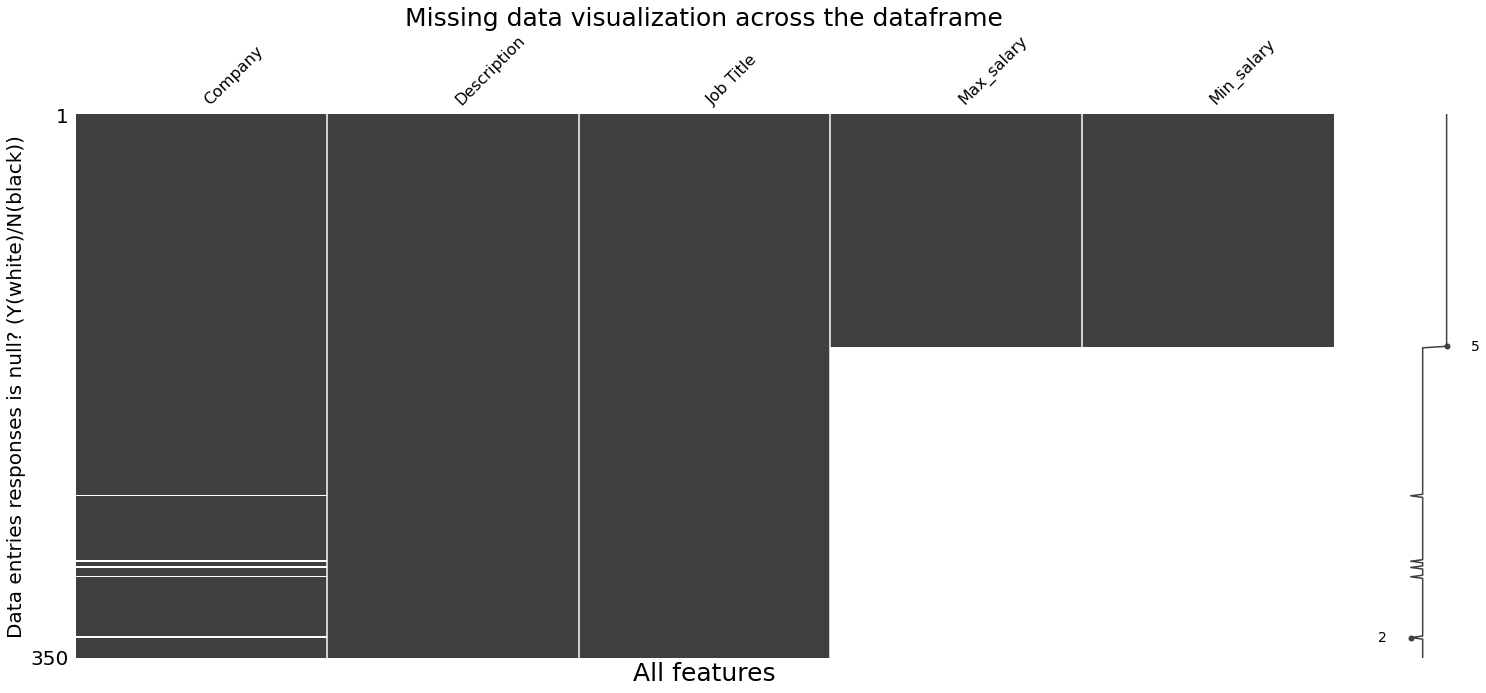

In [19]:
# checking for null values
ax = msno.matrix(final_df)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

## checking missing values in each features
missing_value_count = final_df.isna().sum().sort_values(ascending=False)
print(missing_value_count) #type = pandas series

missing_text_list = final_df[final_df['Description'].isnull()].index.tolist()


final_df.ix[missing_text_list]

## Dropping rows with missing description

In [0]:
final_df = final_df.drop(final_df.index[missing_text_list])
final_df = final_df.reset_index(drop = True)

## Replacing null values with 'company_not_mentioned' in the rows with missing company

In [0]:
final_df["Company"].fillna("company_not_mentioned", inplace = True)

Min_salary     200
Max_salary     200
Job Title        0
Description      0
Company          0
dtype: int64

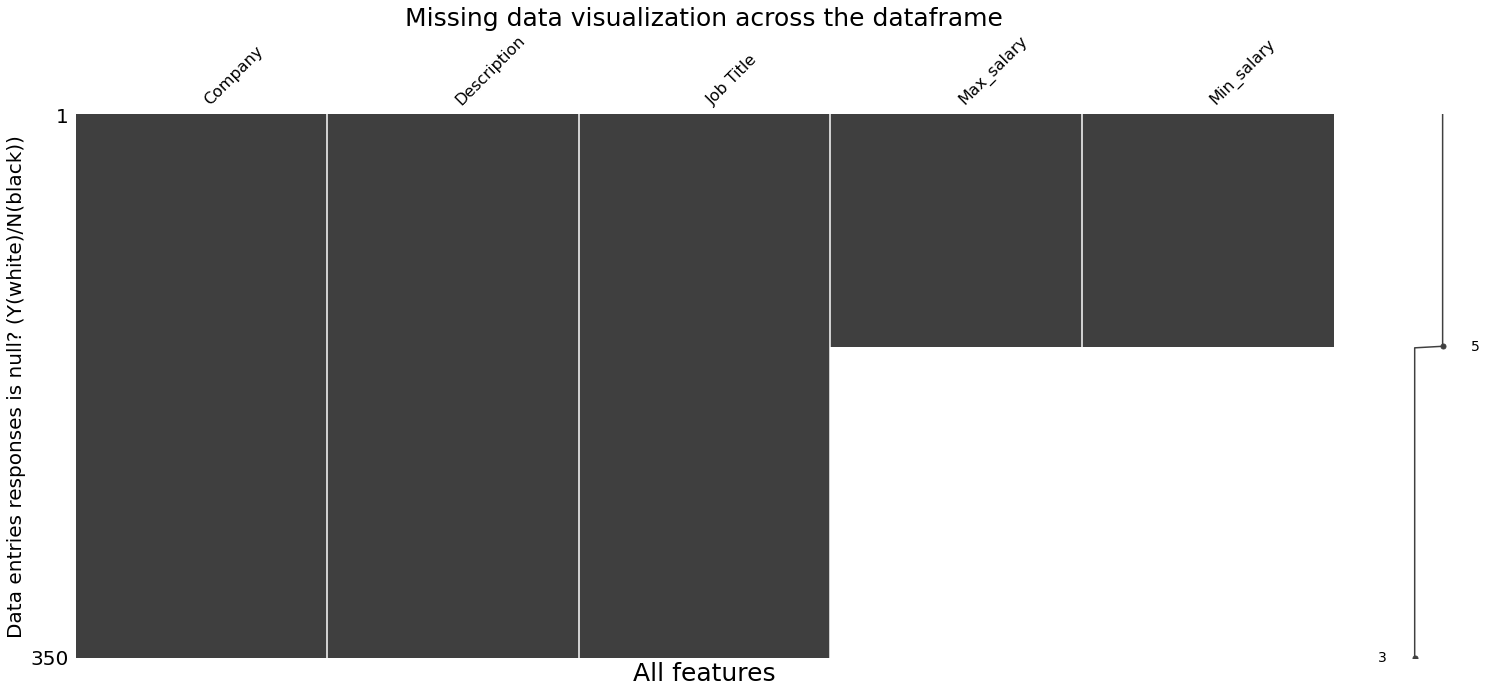

In [22]:
ax = msno.matrix(final_df)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

missing_value_count = final_df.isna().sum().sort_values(ascending=False)
missing_value_count

In [23]:
final_df.head()

,Company,Description,Job Title,Max_salary,Min_salary
0,"AMZN CAN Fulfillment Svcs, ULC","Terms of employment: Full time, permanent\n\nJ...",Applied Scientist II,141300.0,141300.0
1,Ontario Agency for Health Protection and Promo...,Overview\n \nResponsibilities\n \nRequirements\n,Data Scientist,141300.0,141300.0
2,LG Electronics,"Director, Head of Toronto Artificial Intellig...",Director - Head of Toronto Artificial Intellig...,141300.0,141300.0
3,SAP,COMPANY DESCRIPTION \nSAP started in 1972 as a...,"Development Expert, SAP Analytics Cloud (Conve...",141300.0,141300.0
4,Red River Mutual,"LOCATION: Altona or Winnipeg, MB\nSCHEDULE: F...",Vice President of Data & Analytics,141300.0,141300.0


# 2. DATA CLEANING

## 2.1. Cleaning job data

In [0]:
# -------------------- Splitting based on spaces--------------------------------#
final_df['tokenized'] = final_df['Description'].apply(lambda x: tokenize(x))

# -------------------- Removing '\n' from the begining of each word --------------------------------#
final_df['tokenized_edited'] = final_df['tokenized'].apply(lambda x: list(map(lambda y: y.lstrip('\n').rstrip('\n'), x)))
final_df['tokenized_edited'] = final_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.replace('\n',' '), x)))

# -------------------- Lowercasing -----------------------------------------------------------------#
final_df['lowercased'] = final_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lower(), x)))

# -------------------- punctuation removal ---------------------------------------------------------#
final_df['punctuation_removed'] = final_df['lowercased'].apply(lambda x: remove_punctuation(x))

# -------------------- lemmetizing ---------------------------------------------------------#
final_df['lemmatized'] = final_df['punctuation_removed'].apply(lambda x: lemmatizer(x))
final_df['lemmatized'] = final_df['lemmatized'].apply(lambda x: list(filter(lambda y: y != "", x)))

# -------------------- detokenizing --------------------------------------------------------#
final_df['cleaned_text'] = final_df['lemmatized'].apply(lambda x: detokenize(x))

## 2.2. Cleaning skill data

In [0]:
final_list_skills_cleaned = final_list_skills.copy()

# -------------------- punctuation removal ---------------------------------------------------------#
final_list_skills_cleaned = list(map(lambda y: "".join([char for char in y if char not in to_remove]), 
                                     final_list_skills_cleaned))

# -------------------- lemmetizing ---------------------------------------------------------#
final_list_skills_cleaned = lemmatizer(final_list_skills_cleaned)

stopwords_new_list = list(set(['able', 'action', 'at', 'basic', 'chain', 'chef', 'clean', 'factor', 'focus', 'go', 'goal', 
                      'make', 'mathematical', 'max', 'metal', 'natural', 'pipeline', 'plus', 'processing', 'maximum', 'nice',
                      'self', 'simple', 'span', 'sr', 'thinker', 'code', 'cool', 'gap', 'gps', 'id', 'inform', 'jean', 
                    'pilot', 'powerhouse', 'pure', 'rapid', 'red', 'revolution', 'rpg', 'rust', 'sa', 'signal', 'small', 
                    'tom', 'data science', 'panda', 'bc']))

final_list_skills_cleaned = [i for i in final_list_skills_cleaned if i not in stopwords_new_list]

In [26]:
print('-----------total number of skills after merging and cleaning ----------------------\n')

len(final_list_skills_cleaned)

-----------total number of skills after merging and cleaning ----------------------



806

# 3. ANALYZING THE TEXT

## 3.1. Extracting all the skills

The final list of skills that was cleaned in the previous step, is now used to count the appearance of skills in each job posting. Skill frequencies are plotted to visualize general importance.

Bag of trigrams has been used to carry out the task.

In [27]:
# ----------------------Get all the tri grams (one can also use nltk.util.ngram) -------------------------------------#
ngrams = TfidfVectorizer(ngram_range=(1,3), norm=None, smooth_idf=False, use_idf=False)
X_total = ngrams.fit_transform(final_df['cleaned_text'])
full_vocab = ngrams.get_feature_names()


# ----------------------filter the full tri gram based on skills list -------------------------------------#
filtered_v = filter_skill_vocab(full_vocab,final_list_skills_cleaned)

# ----------------------Get tf using the new filtere vocab -------------------------------------#
vectorizer = TfidfVectorizer(ngram_range=(1,3), vocabulary=filtered_v, use_idf=False)
# vectorizer = CountVectorizer(ngram_range=(1,3), vocabulary=filtered_v)
X = vectorizer.fit_transform(final_df['cleaned_text'])
v = vectorizer.get_feature_names()

X_df = pd.DataFrame(np.round(X.toarray(), 4), columns = vectorizer.get_feature_names())
X_df

,ab test,ab testing,ai,artificial intelligence,aws,azure,bash,big data,blockchain,blue,business intelligence,cassandra,cloud computing,collaborative,communication,consulting,creative,dart,data mining,data modeling,data visualization,database,datadriven decision,dc,debugging,deep learning,diverse thinker,dog,ease,excel,experimental design,fin,finance,financial planning,flex,flume,formula,forth,fp,gcp,...,project management,python,qi,rapidprototyping,rdbms,recommender system,saas,sap,scala,shark,snap,spark,splunk,spotfire,spss,sql,statistic,statistical analysis,statistical hypothesis,statistical model,statistical modeling,supervised learning,supervised statistical learning,tableau,tea,team player,text mining,tie,time management,time series analysis,timeseries analysis,timesseries analysis,tsql,unity,unix,unix shell,unixlinux,vba,visual basic,word
0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.9649,0.1608,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.1072,0.0,0.0000,0.0,0.0536,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0536,0.0000,0.0,0.0,0.0,0.0536,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0754,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0754,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9799,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0000,0.1857,0.0,0.0000,0.0,0.3714,0.0,0.0,0.0000,0.0,0.0,0.1857,0.1857,0.0,0.3714,0.0,0.0000,0.0000,0.0000,0.1857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.3714,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.3714,0.0,0.0000,0.0,0.3714,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.4082,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.4082,0.0,0.4082,0.4082,0.0,0.0,0.0,0.0,0.0,0.0,0.4082,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.000

In [28]:
print('-----------------total number of skills extracted from jobs--------------------\n')
len(v)

-----------------total number of skills extracted from jobs--------------------



132

### getting the count of the skills presence.

In the code below is a variation of dataframe obtained form brag of ngrams, where instead of the frequency, there is a boolean 1 or 0 if the skill is in the job posting or not

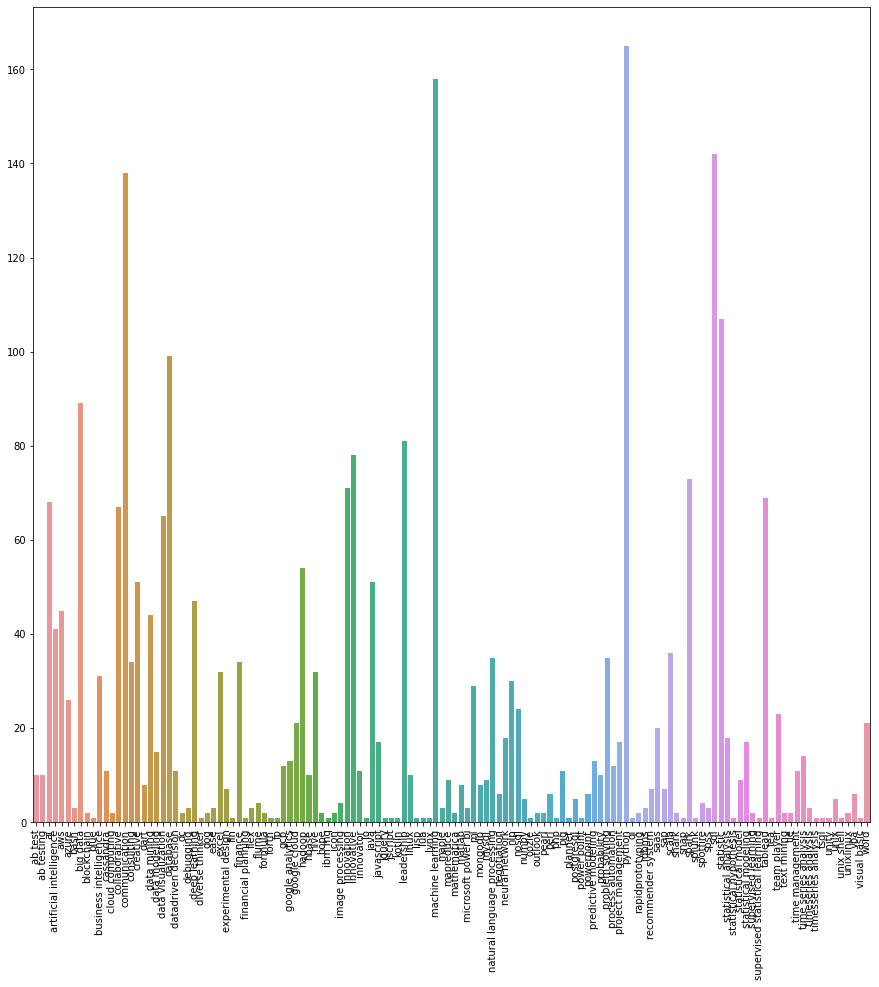

In [29]:
#-------------------------getting the count of the word appearance--------------------------#

counter = CountVectorizer(ngram_range=(1,3), vocabulary=filtered_v)
counted = counter.fit_transform(final_df['cleaned_text'])
counted_df = pd.DataFrame(np.round(counted.toarray(), 4), columns = counter.get_feature_names())
counted_df_1 = counted_df.applymap(lambda x: x/x if (x>0) else 0)

plt.figure(figsize=(15,15))
sns.barplot(x = counted_df_1.sum(axis = 0).index, y = counted_df_1.sum(axis = 0).values)
plt.xticks(rotation = 'vertical')
# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)

plt.show()

## 3.2.  Combining categories with similar names

There are many n-grams that mean essentially the same thing, but are appearing as different skills due to phrasing. Here those skills are combined into single entries.

Term ngram frequency is that reperformed for the merged skill list.

In [0]:
## merging a few categories

to_merge = {' ai ': ' artificial intelligence ', ' cloud ': ' cloud computing ', ' clustering ': ' clustering algorithm ', 
            ' creative thinking ': ' creative ', ' diverse thinker ': ' creative thinking ', ' innovative ':' innovation ', 
            ' innovator ':' innovation ', ' ml ': ' machine learning ', ' nlp ':' natural language processing ', 
            ' javascript ': ' java ', ' modelling ':' modeling ', ' statistic ': ' statistical ', 
            ' time series analysis ': ' timeseries analysis ', ' timesseries analysis ': ' timeseries analysis ', 
            ' mysql ': ' sql ', ' fp ': ' financial planning ', ' finance ': ' financial planning ', ' r ': ' rprogramming ', 
            ' c ': ' cprogramming ', ' c++ ': ' cprogramming ', ' statistical model ': ' statistical analysis ', 
            ' data model ': ' data modeling ', ' debug ': ' debugging ', ' statistical hypothesis ': ' statistical analysis ', 
            ' inference ': ' modeling ', ' statistical modeling ': ' statistical analysis ', ' ab test ': ' ab testing ', 
            ' system ': ' systems '}

In [0]:
final_df['merged_text'] = final_df['cleaned_text'].apply(lambda x: replace_words(x, to_merge))

In [32]:
# ----------------------Get all the tri grams (one can also use nltk.util.ngram) -------------------------------------#
ngrams_merged = TfidfVectorizer(ngram_range=(1,3), norm=None, smooth_idf=False, use_idf=False)
X_total_merged = ngrams_merged.fit_transform(final_df['merged_text'])
full_vocab_merged = ngrams_merged.get_feature_names()


# ----------------------filter the full tri gram based on skills list -------------------------------------#
filtered_v_merged = filter_skill_vocab(full_vocab_merged,final_list_skills_cleaned)

# ----------------------Get tf using the new filtere vocab -------------------------------------#
vectorizer_merged = TfidfVectorizer(ngram_range=(1,3), vocabulary=filtered_v_merged, use_idf=False)
# vectorizer = CountVectorizer(ngram_range=(1,3), vocabulary=filtered_v)
X_merged = vectorizer_merged.fit_transform(final_df['merged_text'])
v_merged = vectorizer_merged.get_feature_names()
print (v_merged)

X_df_merged = pd.DataFrame(np.round(X_merged.toarray(), 4), columns = vectorizer_merged.get_feature_names())
X_df_merged


['ab testing', 'artificial intelligence', 'aws', 'azure', 'bash', 'big data', 'blockchain', 'blue', 'business intelligence', 'cassandra', 'cloud computing', 'clustering algorithm', 'collaborative', 'communication', 'consulting', 'cprogramming', 'creative', 'dart', 'data mining', 'data modeling', 'data visualization', 'database', 'datadriven decision', 'dc', 'debugging', 'deep learning', 'dog', 'ease', 'excel', 'experimental design', 'fin', 'financial planning', 'flex', 'flume', 'formula', 'forth', 'gcp', 'google analytics', 'google cloud', 'hadoop', 'hbase', 'hive', 'hope', 'ibm mq', 'icon', 'image processing', 'innovation', 'io', 'java', 'jquery', 'jscript', 'kotlin', 'leadership', 'linux', 'lisp', 'lua', 'lynx', 'machine learning', 'maple', 'mapreduce', 'mathematica', 'matlab', 'microsoft power bi', 'mongodb', 'natural language processing', 'negotiation', 'neural network', 'nosql', 'numpy', 'oozie', 'outlook', 'pearl', 'perl', 'php', 'pig', 'planner', 'postgresql', 'power point', 'po

,ab testing,artificial intelligence,aws,azure,bash,big data,blockchain,blue,business intelligence,cassandra,cloud computing,clustering algorithm,collaborative,communication,consulting,cprogramming,creative,dart,data mining,data modeling,data visualization,database,datadriven decision,dc,debugging,deep learning,dog,ease,excel,experimental design,fin,financial planning,flex,flume,formula,forth,gcp,google analytics,google cloud,hadoop,...,predictive modeling,probability,problem solving,process automation,project management,python,qi,rapidprototyping,rdbms,recommendation systems,recommender systems,rprogramming,saas,sap,scala,shark,snap,spark,splunk,spotfire,spss,sql,statistical analysis,supervised learning,supervised statistical learning,tableau,tea,team player,text mining,tie,time management,timeseries analysis,tsql,unity,unix,unix shell,unixlinux,vba,visual basic,word
0,0.0,0.0000,0.0,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.5774,0.0,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0000,0.0,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.9770,0.0,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0930,0.0,0.000,0.0000,0.0,0.0465,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0465,0.0000,0.0,0.0,0.0,0.0,0.0465,0.0,0.0,0.000,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0000,0.0,0.000,0.0,0.0745,0.0,0.0,0.0000,0.0,0.1491,0.0,0.0000,0.0000,0.0,0.000,0.0745,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.969,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0000,0.0,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.1826,0.0,0.000,0.0,0.3651,0.0,0.0,0.0000,0.0,0.1826,0.0,0.1826,0.1826,0.0,0.000,0.3651,0.0,0.0000,0.0000,0.0000,0.1826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.3651,...,0.0,0.0,0.0,0.0,0.0000,0.3651,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.000,0.0,0.0,0.3651,0.0,0.0000,0.0,0.3651,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0000,0.0,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.4472,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000,0.000,0.0,0.0,0.0000,0.0,0.4472,0.0,0.4472,0.0,0.0,0.0,0.4472,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0.0000,0

In [33]:
print ('---------------- words obtained after the merging skills ---------------\n')
len(v_merged)

---------------- words obtained after the merging skills ---------------



119

## 3.3 Exploring Job Skill data

In this section the skills contained in the job postings are visualized. The most frequent skills appear in the most job postings, and are considered to be essential to our educational programs to prepare students for industry. 

The skills occuring less frequently are not necessarily less important, just less general. Infrequently appearing skills may be pursued in elective classes, but the most frequent skills must be included in core classes. 

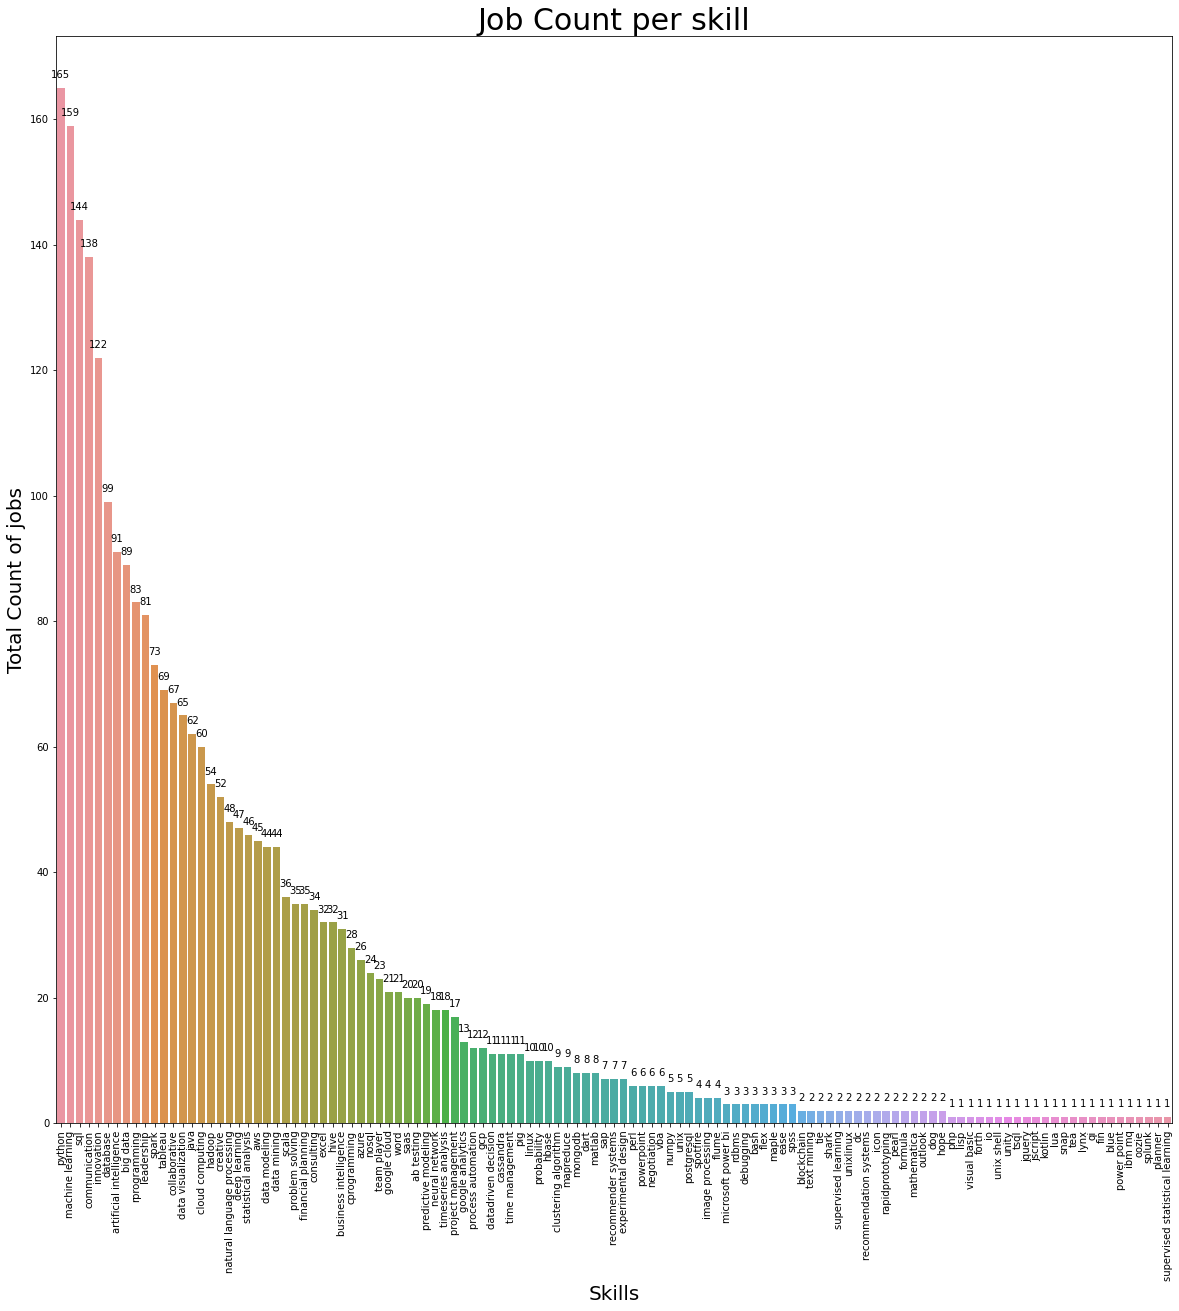

In [34]:
#-------------------------getting the count of the word appearance--------------------------#

counter = CountVectorizer(ngram_range=(1,3), vocabulary=filtered_v_merged)
counted = counter.fit_transform(final_df['merged_text'])
counted_df = pd.DataFrame(np.round(counted.toarray(), 4), columns = counter.get_feature_names())
counted_df_1 = counted_df.applymap(lambda x: x/x if (x>0) else 0)

skills_df_final = counted_df_1.T
skills_df_final['Total'] = skills_df_final.sum(axis = 1)
skills_df_final = skills_df_final.sort_values(['Total'], ascending = False)


plt.figure(figsize=(20,20))
sns.barplot(x = skills_df_final.index, y = skills_df_final['Total'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Skills', fontsize = 20)
plt.ylabel('Total Count of jobs', fontsize = 20)
plt.title('Job Count per skill', fontsize = 30)
# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)
for x,y in zip(np.arange(0,skills_df_final.shape[0],1),skills_df_final['Total']):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center




plt.show()
# plt.savefig('Jobs.png', dpi=200)

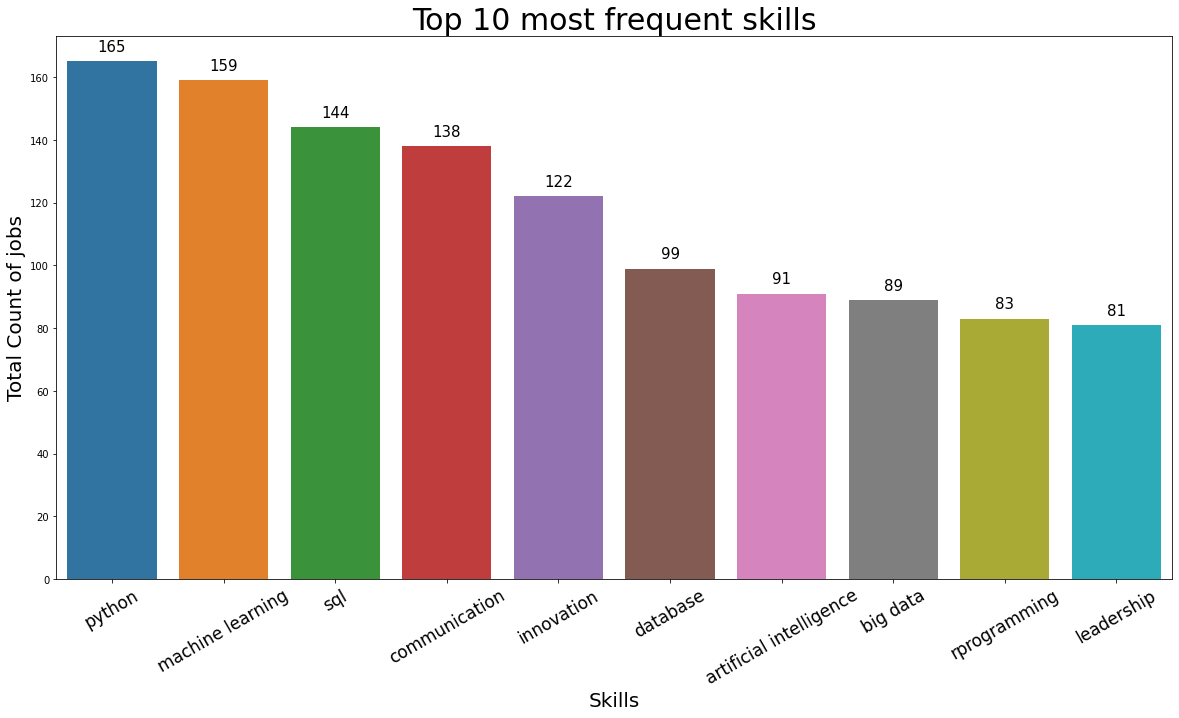

In [35]:
#-------------------------getting the count of the top 10 skills--------------------------#

plt.figure(figsize=(20,10))
sns.barplot(x = skills_df_final.index[0:10], y = skills_df_final['Total'][0:10])
plt.xticks(rotation = 30, fontsize = 17)
plt.xlabel('Skills', fontsize = 20)
plt.ylabel('Total Count of jobs', fontsize = 20)
plt.title('Top 10 most frequent skills', fontsize = 30)

# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)
for x,y in zip(np.arange(0,10,1),skills_df_final['Total'][0:10]):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize = 15) # horizontal alignment can be left, right or center

plt.show()
# plt.savefig('Jobs.png', dpi=200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


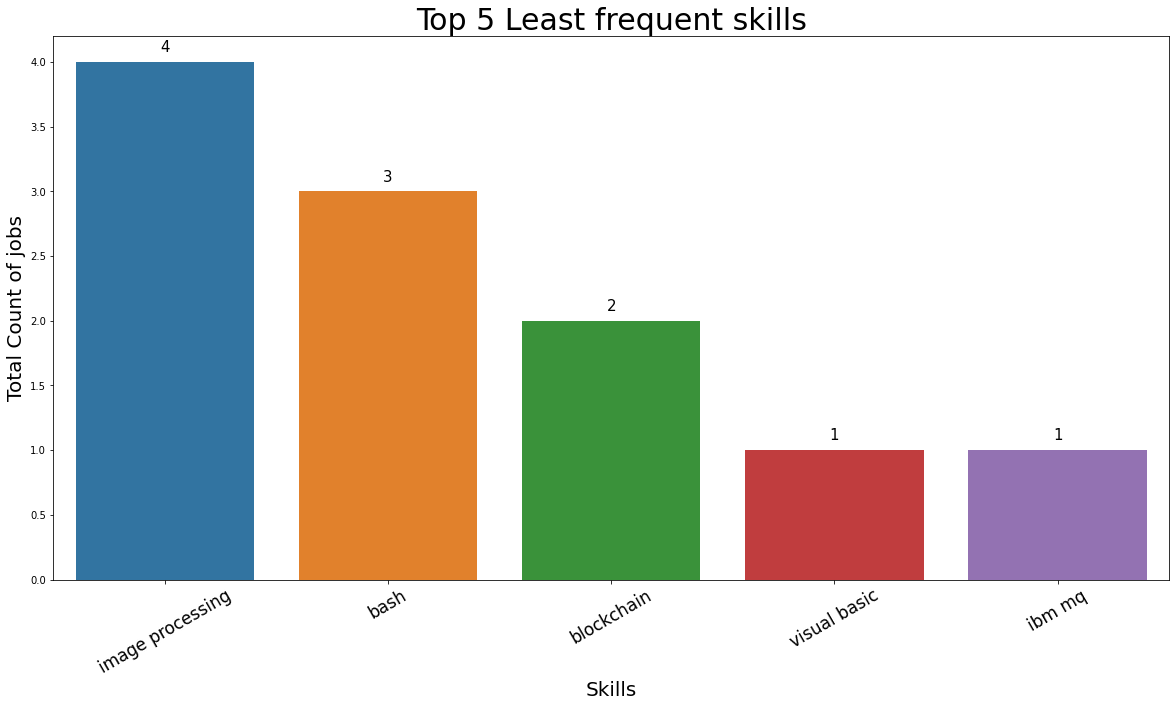

In [36]:
## least frequent skills

least_skill_list = ['image processing', 'bash', 'blockchain', 'visual basic', 'ibm mq']

#-------------------------getting the count of the top 10 skills--------------------------#

plt.figure(figsize=(20,10))
sns.barplot(x = skills_df_final.ix[least_skill_list].index, y = skills_df_final.ix[least_skill_list]['Total'])
plt.xticks(rotation = 30, fontsize = 17)
plt.xlabel('Skills', fontsize = 20)
plt.ylabel('Total Count of jobs', fontsize = 20)
plt.title('Top 5 Least frequent skills', fontsize = 30)

# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)
for x,y in zip(np.arange(0,5,1),skills_df_final.ix[least_skill_list]['Total']):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize = 15) # horizontal alignment can be left, right or center

plt.show()
# plt.savefig('Jobs.png', dpi=200)

### Data visualization skills

In [0]:
visual_language = {'tableau':len(final_df[final_df['merged_text'].str.contains("tableau")]['merged_text']), 
                   'SAP': len(final_df[final_df['merged_text'].str.contains("sap")]['merged_text']),
                   'microsoft power bi': len(final_df[final_df['merged_text'].str.contains("microsoft power bi")]['merged_text'])}

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

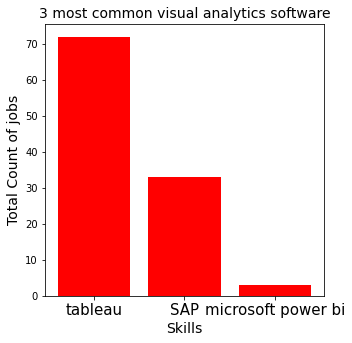

In [38]:
plt.figure(figsize=(5,5))
plt.bar(x = visual_language.keys(), height = visual_language.values(), color = 'r')
plt.xlabel('Skills', fontsize = 14)
plt.ylabel('Total Count of jobs', fontsize = 14)
plt.title('3 most common visual analytics software', fontsize = 14)
plt.xticks(fontsize = 15)

### Final Dataframe obtained with skills as index and jobs as columns

In [39]:
skills_df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,Total
python,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,165.0
machine learning,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,159.0
sql,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,144.0
communication,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,138.0
innovation,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ibm mq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
oozie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
splunk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
planner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Filtering out skills based on appearance in jobs

Clustering skills is a useful tool for building courses and curricula. By clustering, courses can be targetted to build competencies in each cluster. 

The full skills list, even after merging, contains many infrequently sought after skills. To build core course requirements for the Masters program, the full skills list was reduced to include only those appearing in **at least 10 jobs**, and clusters were built from this reduced list. 

In [40]:
cutoff = 10
filtered_skills_list = skills_df_final[skills_df_final['Total']>=cutoff].index
all_skills = skills_df_final.index
print('----------------- skills after filtering --------------------\n')
len(filtered_skills_list)


----------------- skills after filtering --------------------



53

In [41]:
# ----------------------Get tf using the new filtered vocab of skills -------------------------------------#
vectorizer_cutoff = TfidfVectorizer(ngram_range=(1,3), vocabulary=filtered_skills_list, use_idf=False)
X_cutoff = vectorizer_cutoff.fit_transform(final_df['merged_text'])
v_cutoff = vectorizer_cutoff.get_feature_names()

X_df_cutoff = pd.DataFrame(np.round(X_cutoff.toarray(), 4), columns = vectorizer_cutoff.get_feature_names())
X_df_cutoff.head()

,python,machine learning,sql,communication,innovation,database,artificial intelligence,big data,rprogramming,leadership,spark,tableau,collaborative,data visualization,java,cloud computing,hadoop,creative,natural language processing,deep learning,statistical analysis,aws,data modeling,data mining,scala,problem solving,financial planning,consulting,excel,hive,business intelligence,cprogramming,azure,nosql,team player,google cloud,word,saas,ab testing,predictive modeling,neural network,timeseries analysis,project management,google analytics,process automation,gcp,datadriven decision,cassandra,time management,pig,linux,probability,hbase
0,0.0,0.5774,0.0,0.0000,0.5774,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.5774,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.1397,0.0,0.0931,0.0931,0.0,0.9781,0.0000,0.0,0.0466,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.3015,0.0,0.0000,0.6030,0.0,0.0000,0.3015,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.6030,0.0,0.3015,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation Between the Skills

Correlation Matrix picked these features count =  53


Text(159.0, 0.5, 'Potential Skills')

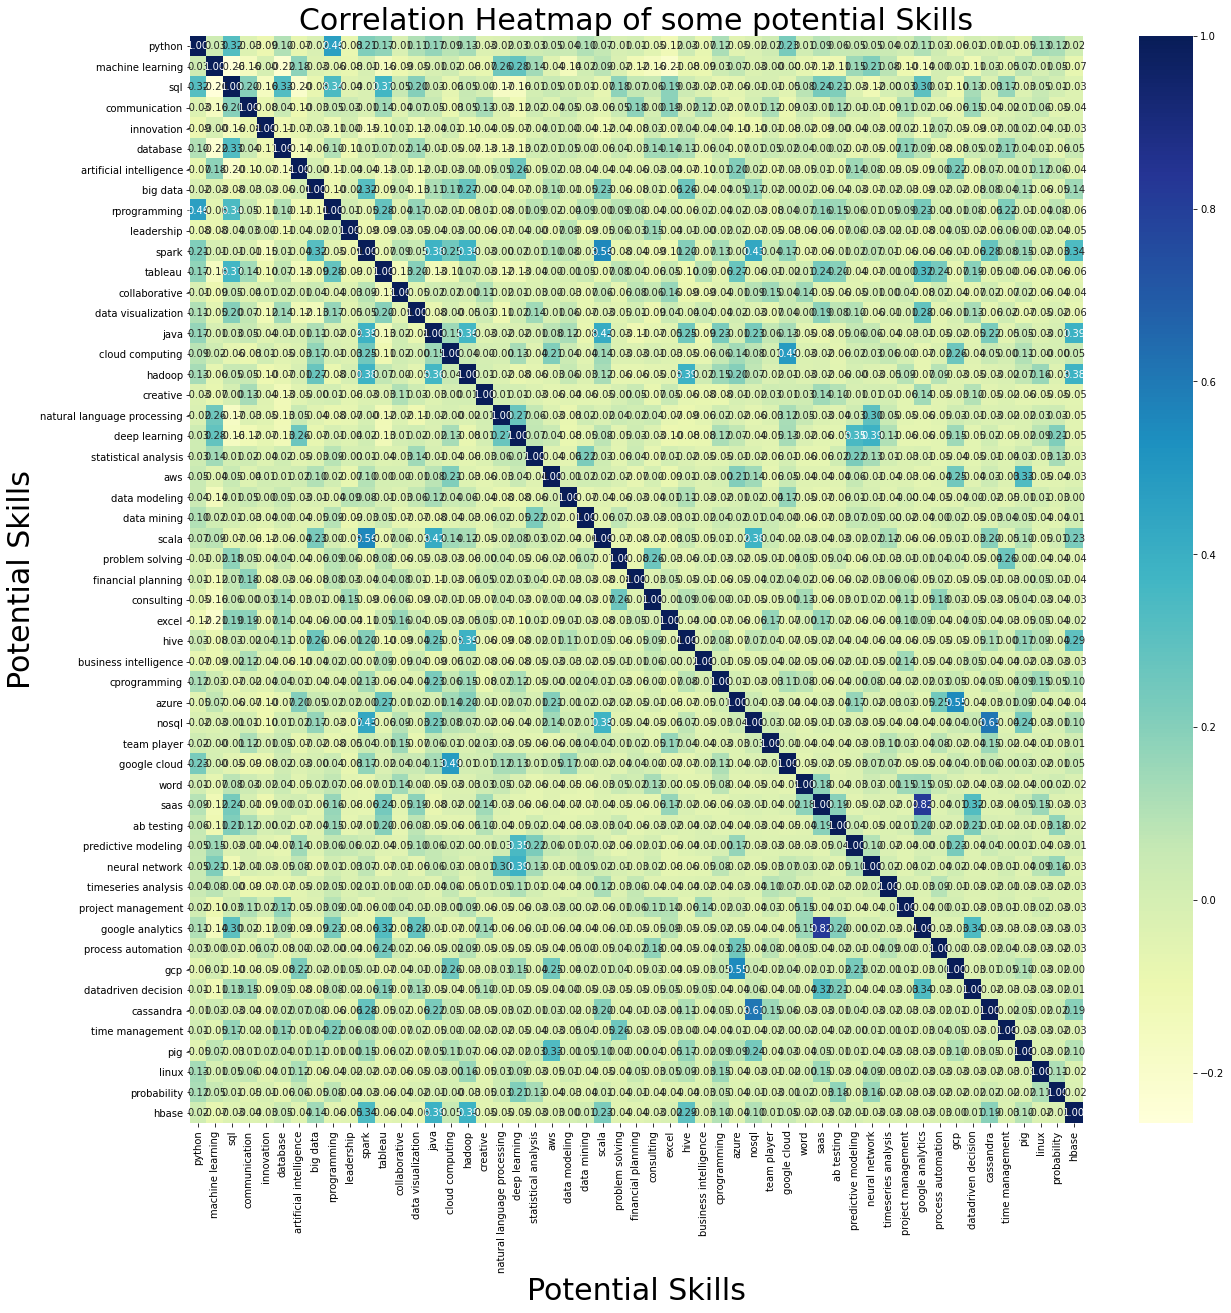

In [42]:
#get correlations of each features in dataset
corrmat = skills_df_final[skills_df_final['Total']>=cutoff].iloc[:,:-1].T.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Correlation with output variable
cor_target = abs(corrmat)
#Selecting highly correlated features
relevant_features = cor_target[cor_target<1.0][cor_target>0.5]
print('Correlation Matrix picked these features count = ', len(relevant_features))

# ploting heat map
g=sns.heatmap(X_df_cutoff[pd.Series(relevant_features.index.values)].corr(),annot=True,
             fmt='.2f', cmap="YlGnBu")
g.set_title("Correlation Heatmap of some potential Skills", fontsize=30)
g.set_xlabel("Potential Skills",fontsize=30)
g.set_ylabel("Potential Skills",fontsize=30)

In [0]:
## checking only the lower triangle of the diagonally symmetric matrix

similar_skill_list = []
check_i = []
for i in relevant_features.columns:
    for j in relevant_features.index:
        if  str(relevant_features[i].notna()[j]) == 'True':
            if [i,j, skills_df_final['Total'][i], skills_df_final['Total'][j]] not in check_i:
                similar_skill_list.append([i,j, skills_df_final['Total'][i], skills_df_final['Total'][j]])
                check_i.append([j,i, skills_df_final['Total'][j], skills_df_final['Total'][i]])

In [44]:
print('------------- skills with correlation more than 50% ------------------\n')
similar_skill_list

------------- skills with correlation more than 50% ------------------



[['python', 'rprogramming', 165.0, 83.0],
 ['cloud computing', 'google cloud', 60.0, 21.0],
 ['natural language processing', 'deep learning', 48.0, 47.0],
 ['aws', 'azure', 45.0, 26.0],
 ['azure', 'gcp', 26.0, 12.0],
 ['saas', 'google analytics', 20.0, 13.0]]


## 3.4 Initiating hierarchichal clustering

The following code produces and plots the clusters using the reduced skill list. The vectors extracted from Ngrams were made into a distance matrix using cosine distance metric. Further Dendograms were made to analyse

The cutoff for dendogram or the clusters distnce is 1.9 which gave 9 skill clusters

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


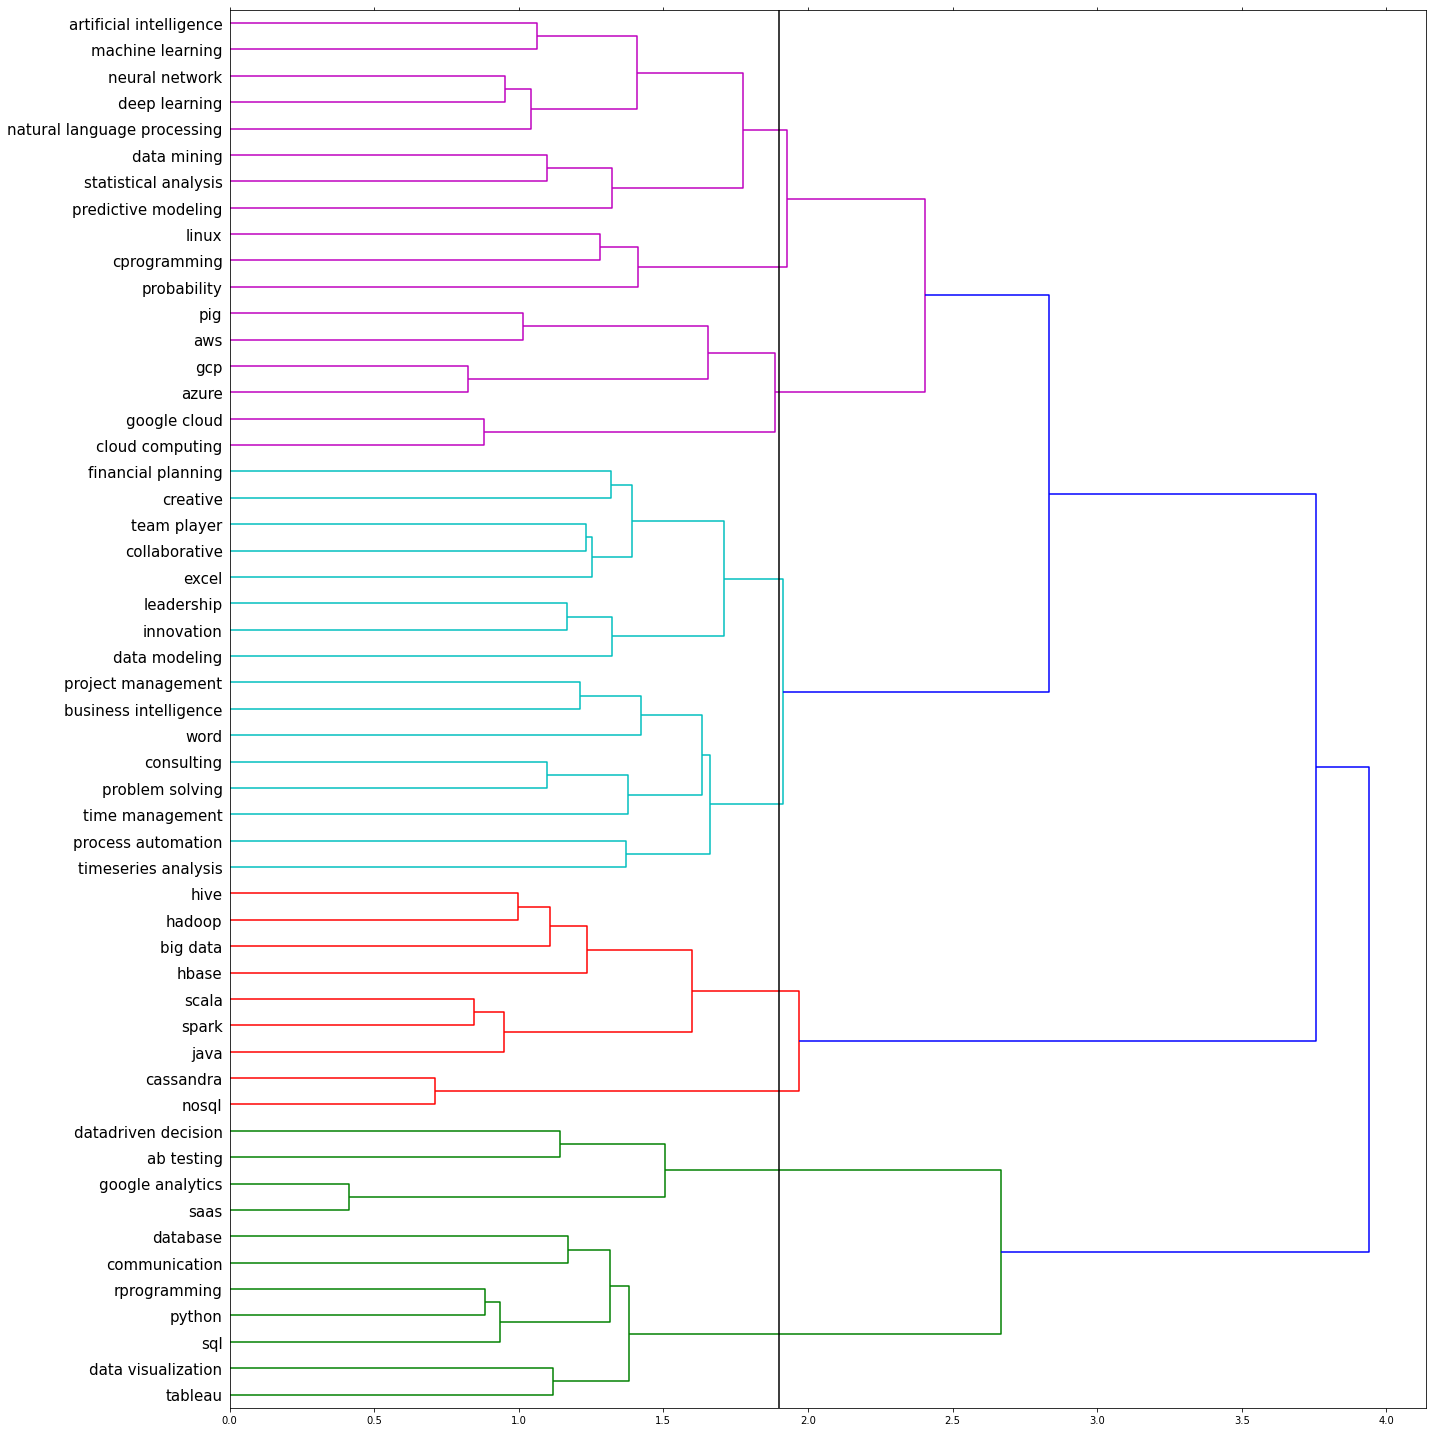

In [45]:
dist2 = pairwise_distances(X_cutoff.T, metric = 'cosine')

linkage_matrix = ward(dist2) #define the linkage_matrix using ward clustering pre-computed distances
cutoff_line = 1.9

fig, ax = plt.subplots(figsize=(20, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels = vectorizer_cutoff.get_feature_names());
plt.axvline(x=cutoff_line, c='k')
plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.yticks(fontsize = '15')
plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [46]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, cutoff_line, criterion='distance')
clusters

array([1, 9, 1, 1, 6, 1, 9, 4, 1, 6, 4, 1, 6, 1, 4, 7, 4, 6, 9, 9, 9, 7,
       6, 9, 4, 5, 6, 5, 6, 4, 5, 8, 7, 3, 6, 7, 5, 2, 2, 9, 9, 5, 5, 2,
       5, 7, 2, 3, 5, 7, 8, 8, 4], dtype=int32)

In [47]:
print('-------------------- number of unique clsters are --------------------\n')
np.unique(clusters)

-------------------- number of unique clsters are --------------------



array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [0]:
skill_label = pd.DataFrame(v_cutoff)
cluster_label = pd.DataFrame(clusters)
final_clustered = pd.concat([skill_label, cluster_label], axis = 1)
final_clustered.columns = ['Skills', 'Cluster']

In [49]:
final_clustered.head()

,Skills,Cluster
0,python,1
1,machine learning,9
2,sql,1
3,communication,1
4,innovation,6


### Job Covered by each cluster

The following visualizes the importance of each cluster by determining how many jobs are associated with each. 

This assignment helps demonstrate the importance of generalizing students' competencies, as many clusters have high job counts, indicating employers' desire for well-rounded students. This shows that by designing a curriculum to meet each of these skill clusters, students will be very well prepared for the job market. Furthermore, soft skills are just as important as technical skills, so it is important to include activities in the curriculum that build these (teamwork, leadership, communication, etc.).


In [0]:
to_merge_cluster_job = {}
cluster_names1 = ['clusterone', 'clustertwo', 'clusterthree', 'clusterfour', 'clusterfive', 'clustersix', 'clusterseven', 
                  'clustereight', 'clusternine']
for i in np.unique(clusters):
    for j in final_clustered[final_clustered['Cluster'] == i]['Skills'].to_list():
        to_merge_cluster_job[j] = cluster_names1[i-1]

In [0]:
final_df['clustered_text'] = final_df['merged_text'].apply(lambda x: replace_words(x, to_merge_cluster_job))

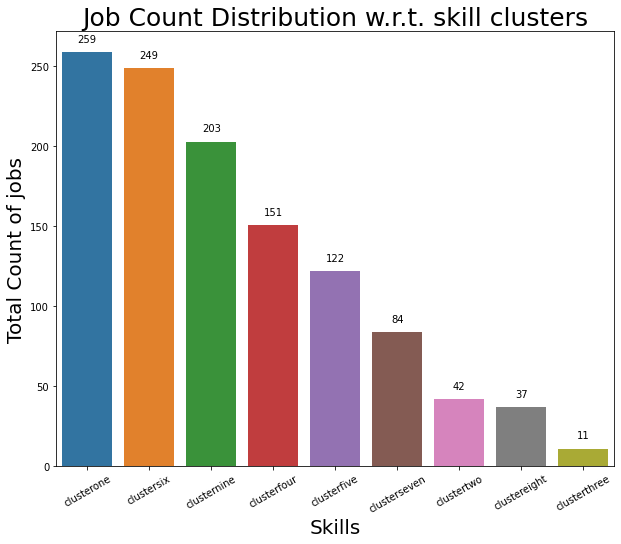

In [52]:
#-------------------------getting the count of each cluster--------------------------#

counter_cluster = CountVectorizer(ngram_range=(1,3), vocabulary=cluster_names1)
counted_cluster = counter_cluster.fit_transform(final_df['clustered_text'])
counted_df_cluster = pd.DataFrame(np.round(counted_cluster.toarray(), 4), columns = counter_cluster.get_feature_names())
counted_df_1_cluster = counted_df_cluster.applymap(lambda x: x/x if (x>0) else 0)

skills_df_final_cluster = counted_df_1_cluster.T
skills_df_final_cluster['Total'] = skills_df_final_cluster.sum(axis = 1)
skills_df_final_cluster = skills_df_final_cluster.sort_values(['Total'], ascending = False)


plt.figure(figsize=(10,8))
sns.barplot(x = skills_df_final_cluster.index, y = skills_df_final_cluster['Total'])
plt.xticks(rotation = 30)
plt.xlabel('Skills', fontsize = 20)
plt.ylabel('Total Count of jobs', fontsize = 20)
plt.title('Job Count Distribution w.r.t. skill clusters', fontsize = 25)
# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)
for x,y in zip(np.arange(0,skills_df_final_cluster.shape[0],1),skills_df_final_cluster['Total']):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center




plt.show()
# plt.savefig('Jobs.png', dpi=200)

In [0]:
skills_df_final_cluster['perc_jobs_rep'] = skills_df_final_cluster['Total'].apply(lambda x: np.round((x/final_df.shape[0])*100,1))

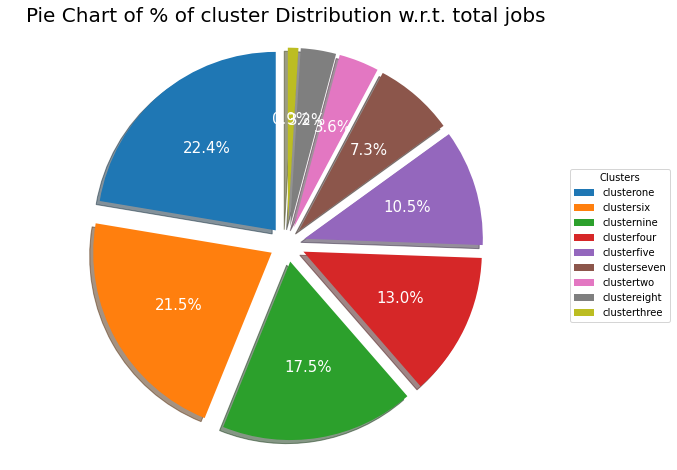

In [54]:
labels = skills_df_final_cluster.index.to_list()
sizes = [(x/skills_df_final_cluster['Total'].to_numpy().sum())*100 for x in skills_df_final_cluster['Total'].to_numpy()]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (10,8))
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Chart of % of cluster Distribution w.r.t. total jobs', fontsize = 20)

ax1.legend(wedges, labels,
          title="Clusters",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, color='w')


plt.show()

([0, 1], <a list of 2 Text major ticklabel objects>)

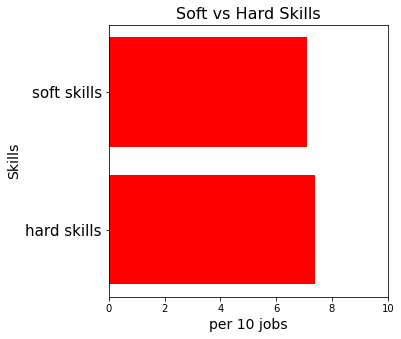

In [55]:
plt.figure(figsize=(5,5))
plt.barh(y = ['hard skills', 'soft skills'], width = [x/10 for x in skills_df_final_cluster['perc_jobs_rep'][0:2].tolist()],
        color = 'r', align = 'center')
plt.xlim(0,10)
plt.ylabel('Skills', fontsize = 14)
plt.xlabel('per 10 jobs', fontsize = 14)
plt.title('Soft vs Hard Skills', fontsize = 16)
plt.yticks(fontsize = 15)

# 4. ASSESSING CLUSTERS ON EDUCATIONAL PLATFORMS

The following section imports and cleans text of course descriptions from University of California at Berkley's Master of Business Analytics Program, University of Toronto Rotman's Master of Business Analytics Program, and Coursera. These classes represent world leading courses in data science and business. The goal of this section is to analyze these courses, compare them to the in-demand skill clusters identified from the job postings, and build a curriculum that meets all skills, while considering key learnings from the previous section of this notebook. 

Web scraping was performed in sepeate notebooks, and data here is imported from excel format.

The nine courses that were assigned to each cluster were incorporated into the new curriculum. By considering the highest in demand skill clusters, previously visualized, critical courses were added to the curriculum as core courses. Extra courses were included as a specialization options. A capstone project and internship was also included, as job seekers are looking for practical experience and soft skills just as much as the hard technical skills (as previously shown). Refer to the final report for a more detailed discussion.

In [0]:
## ---------------- loading relevant files --------------------------------

ucb_original = pd.read_excel('Courses at Berkley (1).xlsx')
ucb_df = ucb_original.copy()
ucb_df['School'] = 'UC_Berkeley'
ucb_df["Tools"].fillna("not_mentioned", inplace = True)
ucb_df["Skills"].fillna("not_mentioned", inplace = True)
ucb_df['Details'] = ucb_df["Tools"] + ucb_df['Skills'] + ucb_df['Details']
ucb_df = ucb_df[['School','Title', 'Details']]

rotman_original = pd.read_excel('Courses at Rotman (1).xlsx')
rotman_df = rotman_original.copy()
rotman_df['School'] = 'Rotman'
rotman_df = rotman_df[['School','Title', 'Details']]

coursera_original = pd.read_excel('Coursera.xlsx')
coursera_df = coursera_original.copy()
coursera_df['School'] = 'Coursera'
coursera_df["Course title"].fillna("not_mentioned", inplace = True)
coursera_df["Skills gained"].fillna("not_mentioned", inplace = True)
coursera_df = coursera_df[['School','Course title','Skills gained']]
coursera_df.columns = ['School','Title', 'Details']

#Add MIE1624 to see how it performs at first pass
MIE1624_original = pd.read_excel('MIE1624.xlsx')
MIE1624_df = MIE1624_original.copy()
MIE1624_df['School'] = 'UofT'
MIE1624_df = MIE1624_df[['School','Title', 'Details']]

In [0]:
univ_df = pd.concat([ucb_df,rotman_df, coursera_df,MIE1624_df], axis = 0)
univ_df = univ_df.reset_index(drop = True)

## 4.1. Cleaning Data

In [0]:
# -------------------- Splitting based on spaces--------------------------------#
univ_df['tokenized'] = univ_df['Details'].apply(lambda x: tokenize(x))

# -------------------- Removing '\n' from the begining of each word --------------------------------#
univ_df['tokenized_edited'] = univ_df['tokenized'].apply(lambda x: list(map(lambda y: y.lstrip('\n').rstrip('\n'), x)))
univ_df['tokenized_edited'] = univ_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lstrip('\xa0').rstrip('\xa0'), x)))
univ_df['tokenized_edited'] = univ_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.replace('\n',' '), x)))


# -------------------- Lowercasing -----------------------------------------------------------------#
univ_df['lowercased'] = univ_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lower(), x)))

# -------------------- punctuation removal ---------------------------------------------------------#
univ_df['punctuation_removed'] = univ_df['lowercased'].apply(lambda x: remove_punctuation(x))

# -------------------- lemmetizing ---------------------------------------------------------#
univ_df['lemmatized'] = univ_df['punctuation_removed'].apply(lambda x: lemmatizer(x))
univ_df['lemmatized'] = univ_df['lemmatized'].apply(lambda x: list(filter(lambda y: y != "", x)))

# -------------------- detokenizing --------------------------------------------------------#
univ_df['cleaned_text'] = univ_df['lemmatized'].apply(lambda x: detokenize(x))

## 4.2. Checking for missing values

cleaned_text           0
lemmatized             0
punctuation_removed    0
lowercased             0
tokenized_edited       0
tokenized              0
Details                0
Title                  0
School                 0
dtype: int64


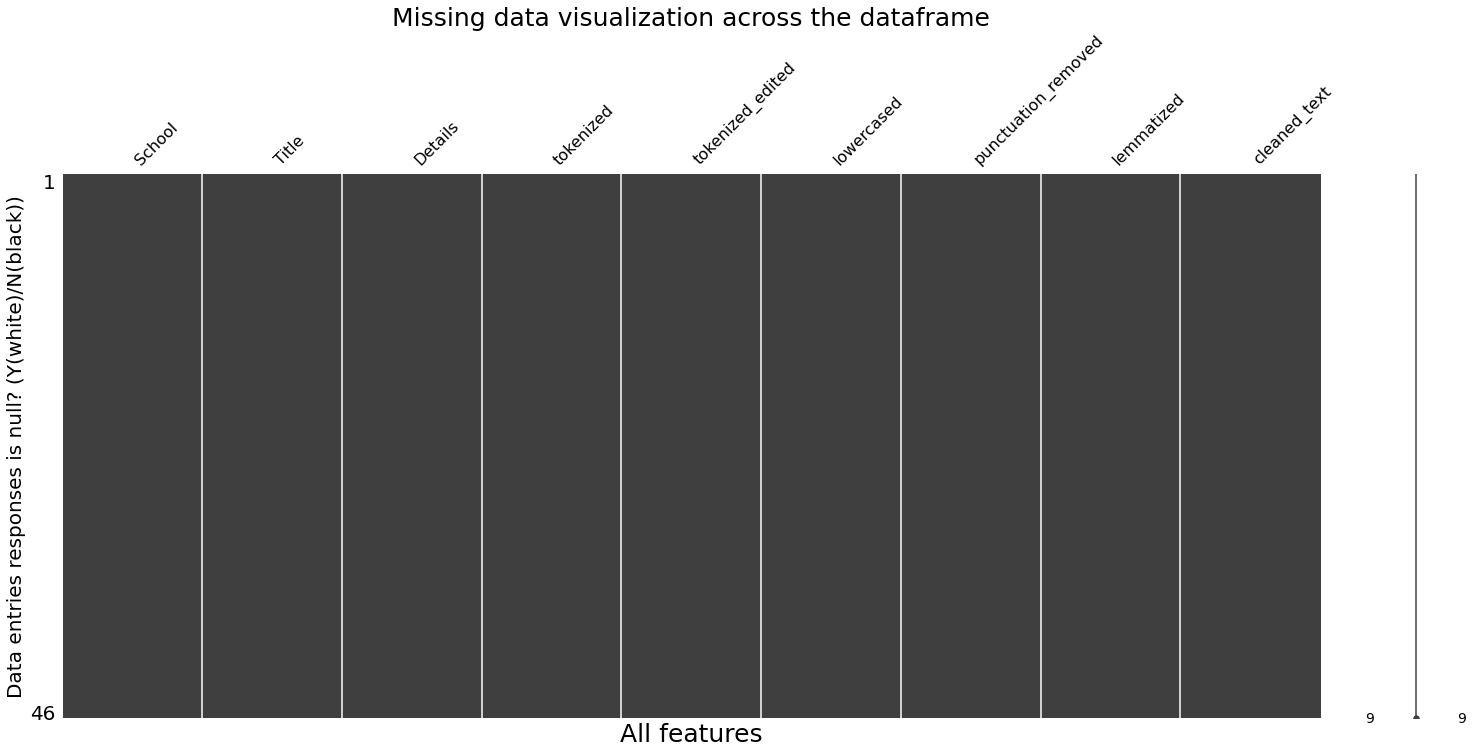

In [59]:
# checking for null values
ax = msno.matrix(univ_df)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

## checking missing values in each features
missing_value_count = univ_df.isna().sum().sort_values(ascending=False)
print(missing_value_count) #type = pandas series

## 4.3. Analysing the skills

In [0]:
##------------------------- merging similar skills in univ. df too ------------------------------------------------------------

to_merge_univ = {' ai ': ' artificial intelligence ', ' cloud ': ' cloud computing ', ' clustering ': ' clustering algorithm ', 
            ' creative thinking ': ' creative ', ' diverse thinker ': ' creative thinking ', ' innovative ':' innovation ', 
            ' innovator ':' innovation ', ' ml ': ' machine learning ', ' nlp ':' natural language processing ', 
            ' javascript ': ' java ', ' modelling ':' modeling ', ' statistic ': ' statistical ', 
            ' time series analysis ': ' timeseries analysis ', ' timesseries analysis ': ' timeseries analysis ', 
            ' mysql ': ' sql ', ' fp ': ' financial planning ', ' finance ': ' financial planning ', ' r ': ' rprogramming ', 
            ' c ': ' cprogramming ', ' c++ ': ' cprogramming ', ' statistical model ': ' statistical analysis ', 
            ' data model ': ' data modeling ', ' debug ': ' debugging ', ' statistical hypothesis ': ' statistical analysis ', 
            ' inference ': ' modeling ', ' statistical modeling ': ' statistical analysis ', ' ab test ': ' ab testing ', 
            ' system ': ' systems ', ' decision making ': ' datadriven decision ',
            ' datadriven decision':' datadriven decision ', ' management ': ' project management ', 
            ' time series ':' timeseries analysis ', ' visualization ': ' data visualization ', 
            ' causal modeling ': ' data modeling ', ' predictive ': ' predictive modeling '}

In [0]:
univ_df['merged_text'] = univ_df['cleaned_text'].apply(lambda x: replace_words(x, to_merge_univ))

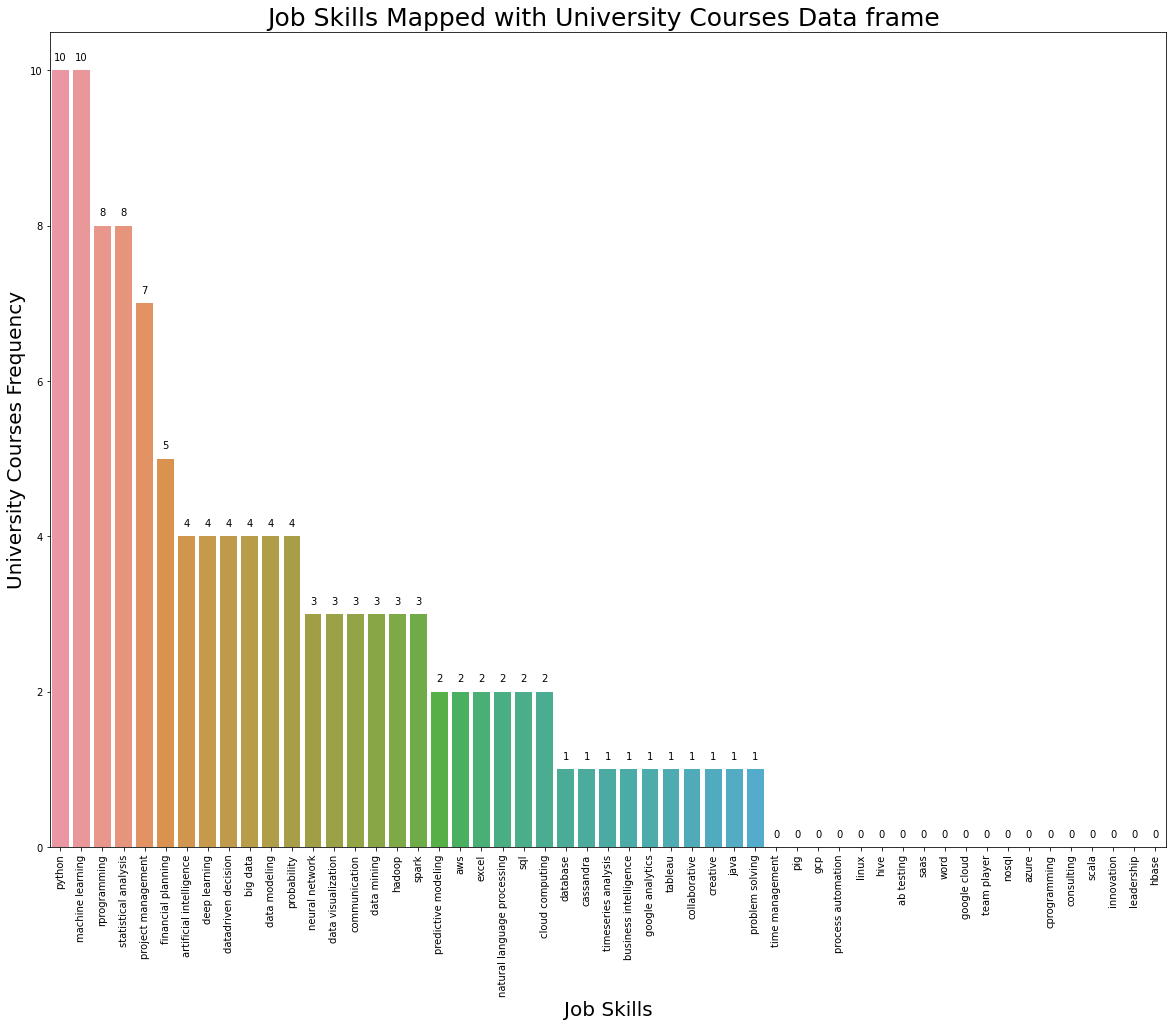

In [62]:
#-------------------------getting the count of the word appearance--------------------------#

counter_univ = CountVectorizer(ngram_range=(1,3), vocabulary=filtered_skills_list)
counted_univ = counter_univ.fit_transform(univ_df['merged_text'])
counted_univ_df = pd.DataFrame(np.round(counted_univ.toarray(), 4), columns = counter_univ.get_feature_names())
counted_univ_df_1 = counted_univ_df.applymap(lambda x: x/x if (x>0) else 0)


skills_df_final_univ = counted_univ_df_1.T
skills_df_final_univ['Total'] = skills_df_final_univ.sum(axis = 1)
skills_df_final_univ = skills_df_final_univ.sort_values(['Total'], ascending = False)
skills_df_final_univ.reset_index(level=0, inplace=True)
skills_df_final_univ = skills_df_final_univ.rename(columns = {"index": "Skills"})

plt.figure(figsize=(20,15))
sns.barplot(x = skills_df_final_univ['Skills'].values, y = skills_df_final_univ['Total'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Job Skills', Fontsize = 20)
plt.ylabel('University Courses Frequency', Fontsize = 20)
plt.title('Job Skills Mapped with University Courses Data frame ', Fontsize = 25)
# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)
for x,y in zip(np.arange(0,skills_df_final_univ.shape[0],1),skills_df_final_univ['Total']):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center




plt.show()

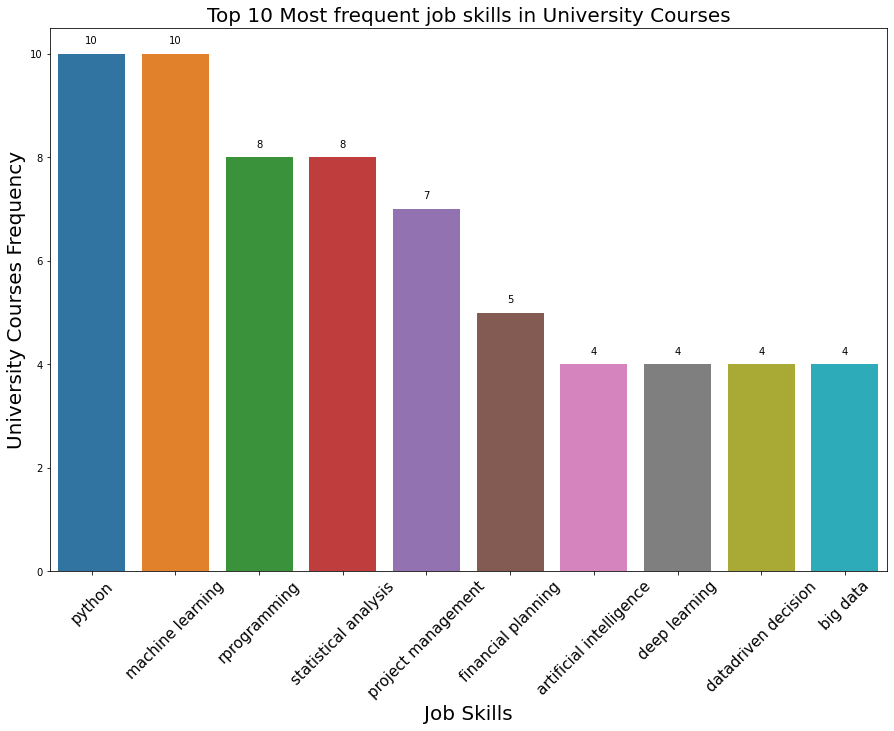

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x = skills_df_final_univ.iloc[0:10,:]['Skills'].values, y = skills_df_final_univ.iloc[0:10,:]['Total'])
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Job Skills', Fontsize = 20)
plt.ylabel('University Courses Frequency', Fontsize = 20)
plt.title('Top 10 Most frequent job skills in University Courses', Fontsize = 20)
# plt.bar(counted_df_1.sum(axis = 0).index, counted_df_1.sum(axis = 0).values)
for x,y in zip(np.arange(0,skills_df_final_univ.iloc[0:10,:].shape[0],1),skills_df_final_univ.iloc[0:10,:]['Total']):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center




plt.show()

## 4.4 Assigning courses to clusters

The courses are assigned to job skill clusters. Using this assignment, the best courses for each cluster can be identified and incorporated into the new Masters curriculum.

In [0]:
univskill_cluster_df = pd.merge(skills_df_final_univ,final_clustered,on='Skills')
univskill_cluster_df = univskill_cluster_df.drop(['Total'], axis = 1)

In [0]:
# univskill_cluster_df[univskill_cluster_df['Cluster']==3]
# univskill_cluster_df.iloc[:,1:-1]

Scoring is done based on the average occurance of each cluster skills in each of the courses by parsing the TFIDF dataframe coulumn wise. Unique courses are chosen for each field of skill cluster

In [0]:
cluster_scores = pd.DataFrame()

for i in np.sort(univskill_cluster_df['Cluster'].unique()):
    score_row = []
    for j in univskill_cluster_df.iloc[:,1:-1].columns:
        score = np.round(np.asarray(univskill_cluster_df[univskill_cluster_df['Cluster']==i][j]).sum()/univskill_cluster_df[univskill_cluster_df['Cluster']==i].shape[0],4)
        score_row.append(score)
    
    cluster_scores[i] = score_row

In [0]:
## overall best scores match with unique course ---------------------------------------------------------------- #

courses_cluster_unique = []
uniqueness_check = cluster_scores.copy()

for i in range (cluster_scores.shape[1]):
    courses_cluster_unique.append(uniqueness_check.iloc[:,i].idxmax(axis = 0))
    uniqueness_check = uniqueness_check.drop([uniqueness_check.iloc[:,i].idxmax(axis = 0)], axis=0)
        

In [68]:
identified_courses = cluster_scores.idxmax(axis = 0).tolist()
identified_courses_df = univ_df.ix[identified_courses]
identified_courses_df.insert(loc=0, column='cluster_number', value=cluster_scores.idxmax(axis = 0).index)
identified_courses_df.insert(loc=1, column='skills', value=cluster_scores.idxmax(axis = 0).index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [69]:
identified_courses_unique = courses_cluster_unique
identified_courses_df_unique = univ_df.ix[identified_courses_unique]
identified_courses_df_unique.insert(loc=0, column='cluster_number', value=np.arange(1,10,1))
# identified_courses_df_unique.insert(loc=1, column='skills', value=cluster_scores.idxmax(axis = 0).index)
pd.set_option('display.max_colwidth', 300)
identified_courses_df_unique[['cluster_number','Title']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,cluster_number,Title
11,1,Data Visualization
1,2,Research Design and Application for Data and Analysis
7,3,Deep Learning in the Cloud and at the Edge
9,4,Machine Learning at Scale
8,5,Statistical Methods
2,6,Statistics for Data Science
3,7,Fundamentals of Data Engineering
4,8,Applied Machine Learning
21,9,Leveraging AI and Deep Learning Tools in Marketing (RSM8521)


# 5. MIE1624 Course Redesign

The MIE1624 course was redesigned to increase its competitiveness for the job market. The code in this section executes the following workflow:
1. Each university course was compared to each job posting, and the percentage of skills alignment tabulated. Courses were ranked by the number of jobs for which they were the single best course to take.
2. The top courses were reviewed, and key components identified.
3. MIE1624 was redesigned to include components that were making other courses stand-out in the job matching rankings.
4. Courses were re-ranked, this time including the redesigned MIE1624, to demonstrate how the newly designed course performs better 



**Key Objects:**

*filtered_skills_list* - list of top skills appearing in at least 10 job postings; 

*filtered_job_skills* - dataframe of all scraped jobs in columns, with filtered_skills_list index, with a binary indicator of whether job requires a given skill; 

*courses* - dataframe of all scraped courses in columns, with filtered_skills_list index, with binary indicator whether course contains given skill

*course_score* - dataframe summarizing job/course scores

*best_courses_sum* - dataframe that has each course as a row, with one column indicating the number of jobs that course is the best match for

'_new' versions of each dataframe are created when re-scoring the course list that includes the revised MIE1624 description.


## 5.2 Rank Existing Courses

### 5.2.1 Create Comparable Job and Course Dataframes

Use the skills_df_final dataframe of jobs, with the filtered_skills_list representing the top in-demand skills to create dataframes for the existing courses and jobs with aligned indices.

In [70]:
filtered_job_skills = skills_df_final.loc[filtered_skills_list].copy()
filtered_job_skills.drop('Total',axis=1,inplace=True)
print(filtered_job_skills.head())

                  0    1    2    3    4    5    ...  344  345  346  347  348  349
python            0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  1.0  0.0  1.0
machine learning  1.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  1.0  0.0  0.0  1.0  0.0
sql               0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0  0.0  1.0
communication     0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  1.0  0.0  0.0  1.0
innovation        1.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 350 columns]


In [71]:
courses = univskill_cluster_df.copy()
courses = courses.set_index('Skills')
courses.drop('Cluster', inplace=True, axis=1)
courses = courses.loc[filtered_skills_list]
print(courses.head())


                   0    1    2    3    4    5   ...   40   41   42   43   44   45
python            1.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  1.0  1.0
machine learning  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  1.0  1.0  0.0  1.0
sql               0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
communication     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
innovation        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 46 columns]


### 5.2.2 Score All Courses

Build a dataframe that scores each course against each job. The more skills that match between the job and course, the higher the score for the course. For example: A job requires python, sql, and innovation; a course offers python and innovation; score = 2/3 = 0.66.

In [0]:
course_score = pd.DataFrame()
scores = []

#loop through each course
for k in range(courses.shape[1]):
  
  score_row = []
  #Each job is a column, loop through jobs by column
  for i in range(filtered_job_skills.shape[1]):
    
    #loop through each skill row and compare it to the course 
    course_skill_total = 0  #intialize the numerator
    job_skill_total = 0     # initialize the denominator
    for j in range(filtered_job_skills.shape[0]):
      #If the job has the skill, add one to the denominator
      if filtered_job_skills.iloc[j,i] == 1:
        job_skill_total = job_skill_total + 1
        #If the course has the skill, add one to the numerator
        if courses.iloc[j,k] == 1:
          course_skill_total = course_skill_total + 1
    if job_skill_total ==0:
      score_row.append(0)
    else:
      score_row.append(course_skill_total/job_skill_total)
    
  scores.append(score_row)

course_scores = pd.DataFrame(scores)
# course_scores.to_csv('CourseScores.csv')
# filtered_job_skills.to_csv('filtered_jobs.csv')
# courses.to_csv('Courses.csv')

### 5.2.3 Sort Courses in Order of Best Performing

The best course for a job is that which has the highest score. This section of code totals the number of best matches for each course. Ties are allowed, for example, if two courses have a score for a given job of 3/6 (or, 0.5), both courses received a best match point.

In [0]:
#create a 2D list of max values for each job
best_courses = []

#Loop through all columns (jobs)
for i in range(course_scores.shape[1]):
  #Create emptry list to enter row indices of best job
  best_row = []
  #Find the top score for the job
  best = course_scores[i].max()
  if best != 0: 
    for j in range(course_scores.shape[0]):
      if course_scores.iloc[j,i] == best:
        best_row.append(j)        
    best_courses.append(best_row)

In [74]:
best_courses_sum = []
#Sum each row and append it to the best_courses_sum lis
for i in range(course_scores.shape[0]):
  best_courses_sum.append(sum(row.count(i) for row in best_courses))

#Create dataframe
best_courses_sum = pd.DataFrame(best_courses_sum)
best_courses_sum.columns = ['Job Count']
best_courses_sum['School'] = univ_df['School']
best_courses_sum['Course'] = univ_df['Title']
best_courses_sum.sort_values(by='Job Count', ascending= False)


,Job Count,School,Course
9,186,UC_Berkeley,Machine Learning at Scale
45,112,UofT,MIE1624 Introduction to Data Science and Analytics
3,63,UC_Berkeley,Fundamentals of Data Engineering
11,51,UC_Berkeley,Data Visualization
4,44,UC_Berkeley,Applied Machine Learning
18,37,Rotman,Modeling Tools for Predictive Analytics (RSM8512)
17,30,Rotman,Structuring and Visualizing Data for Analytics (RSM8411)
23,28,Rotman,Analytic Insights using Accounting and Financial Data (RSM8224)
8,27,UC_Berkeley,Statistical Methods
43,24,Coursera,AI For Everyone


U of T's MIE1624 is already performing quite well, in second place. List the skills from the top 5 courses.

### 5.2.4 List the Skills From Top Classes

In [75]:
best_courses_sorted = best_courses_sum.sort_values(by='Job Count', ascending= False)
for i in range(5):
  course_idx = best_courses_sum.sort_values(by='Job Count', ascending= False).index[i]
  print("The number ", i+1 ," course is ",best_courses_sum.iloc[course_idx,2]," at ",best_courses_sum.iloc[course_idx,1], " and has the the following skills:")
  print(univskill_cluster_df['Skills'][univskill_cluster_df.iloc[:,course_idx+1]==1])

The number  1  course is  Machine Learning at Scale  at  UC_Berkeley  and has the the following skills:
0                 python
1       machine learning
5     financial planning
9               big data
16                hadoop
17                 spark
19                   aws
22                   sql
Name: Skills, dtype: object
The number  2  course is  MIE1624 Introduction to Data Science and Analytics  at  UofT  and has the the following skills:
0                      python
1            machine learning
4          project management
5          financial planning
6     artificial intelligence
13         data visualization
15                data mining
18        predictive modeling
Name: Skills, dtype: object
The number  3  course is  Fundamentals of Data Engineering  at  UC_Berkeley  and has the the following skills:
0              python
16             hadoop
17              spark
19                aws
23    cloud computing
24           database
Name: Skills, dtype: object
The num

## 5.3 Redesign MIE1624 

The following text walks through the redesign of MIE1624. 

The commonality among the top four courses is python. The top courses that are not MIE1624 are based around big data environments, while the number 5 course has visualization and tableau.

Since MIE1624 is already quite good, the existing course outline can be used as a baseline and modified to incorporate skills found in other classes.

First the existing curriculum is commented on, the UC Berkley Course reviewed, key components of the MIE1628 course extracted, and the MIE1624 curriculum rebuilt.



### 5.3.1 Commenting on Existing Course Curriculum

**Existing Course Outline with comments in bold**

Introduction to data science and analytics
1. Data science concepts
2. Application areas of quantitative modeling
**assign reading if refresher on prereq content is required - Python programming, basic statistics**

Python programming, data science software
1. Introduction to Python
2. Comparison of Python, R and Matlab usage in data science
**replace lecture with mini-assignment that requires use of basic python skills, learn python by applying, not in lecture**

Basic statistics
1. Random variables, sampling
2. Distributions and statistical measures
3. Hypothesis testing
4. Statistics case studies in IPython
Overview of linear algebra
1. Linear algebra and matrix computations
2. Functions, derivatives, convexity
Modeling techniques, regression
1. Mathematical modeling process
2. Linear regression
3. Logistic regression
4. Regression case studies in IPython
**Combine the previous three subjects - with a brief refresher on stats/linear algebra**

Data visualization and visual analytics
1. Visual analytics
2. Visualizations in Python and visual analytics in IBM Watson Analytics
**add mini-assignment using Tableau, it is a fairly easy interface and the library has it so no complaints**

Data mining and machine learning
1. Classification (decision trees)
2. Clustering (K-means, Fuzzy C-means, Hierarchical Clustering, DBSCAN)
3. Association rules
4. Advanced supervised machine learning algorithms (Naive Bayes, k-NN, SVM)
5. Intro to ensemble learning algorithms (Random Forest, Gradient Boosting)
6. Data mining case studies in IPython
**leave as is very important**

Optimization
1. Unconstrained non-linear optimization algorithms
2. Overview of constrained optimization algorithms
3. Optimization case studies in IPython
**leave as is very important**
Simulation modeling
1. Random number generation
2. Monte Carlo simulations
3. Simulation case studies in IPython
**leave as is very important**

Cognitive computing and artificial intelligence
1. Intro to neural networks and deep learning
2. Text analytics and natural language processing
3. Reinforcement learning
4. Spatio-temporal analytics
5. Cognitive computing case studies in IPython
**leave as is very important**

Storytelling based on analytics, analytical decision making
1. Validating analytics
2. Storytelling based on analytics
3. Decision-making based on analytics
**include tableau visualizations in project**

**three weeks were saved by condensing intro lectures - assign these to introduction to big data science **

### 5.3.2 UC Berkley Course Review

**The UC Berkley Course Description**
This course builds on and goes beyond the collect-and-analyze phase of big data by focusing on how machine learning algorithms can be rewritten and extended to scale to work on petabytes of data, both structured and unstructured, to generate sophisticated models used for real-time predictions. Conceptually, the course is divided into two parts. *The first covers fundamental concepts of MapReduce parallel computing, through the eyes of Hadoop, MrJob, and Spark, while diving deep into Spark Core, data frames, the Spark Shell, Spark Streaming, Spark SQL, MLlib, and more.* The second part focuses on hands-on algorithmic design and development in parallel computing environments (Spark), developing algorithms (decision tree learning), graph processing algorithms (pagerank/shortest path), gradient descent algorithms (support vectors machines), and matrix factorization. Students will use MapReduce parallel compute frameworks for industrial applications and deployments for various fields, including advertising, finance, healthcare, and search engines. Examples and exercises will be made available in Python notebooks (Hadoop Streaming, MrJob and pySpark).


**The full course cannot be condensed into three weeks, but the first half of the course can. There is another U of T course MIE1628 that provides curriculum guidance for introducing this content.** 


### 5.3.3 MIE1628 Big Data Science Curriculum With Comments


**MIE1628 Course with Comments**

Lecture 2 (May 8th):
Enterprise Hadoop and Hadoop basics
1. HDFS, YARN in detail
2. Launch of the cluster environment and practice of HDFS and YARN
commands
3. Invited lecture by an industry practitioner responsible for establishing an
enterprise Hadoop architecture: Melissa Singh
a. Implementation of a big data project: review of a real business
case with focus on understanding of the complexity of interactions
and convergence of DevOps, legal, data management and data
science teams
**Add this to MIE1624**

Lecture 3 (May 13th):
SQL: Hive and Impala
1. Programming languages: overview, object-oriented vs functional, scripting
languages
2. Big data languages: overview of Spark, Hive & Impala
3. SQL: most important commands
4. Hive vs Impala: comparison between two SQL languages and environments
5. Assignment 1: data mining using Hive
**Add this to MIE1624**


**Combine Lectures 4 through 8 providing introductory material, and discussing the workflow at a higher level**

Lecture 4 (May 15th):
Spark, introduction
1. Introduction into Spark
a. History of Spark, its evolution, libraries
b. Review of Spark APIs: PySpark, Scala, R and Java
c. Spark backend transformations
d. Practice sessions with DataBricks, Scala

Lecture 5 (May 22nd):
Spark, syntax
1. Spark session
2. Import/export of data
3. Spark SQL: functional and scripting
a. 1 student paper review: Spark SQL original paper
4. Working with SQL images
5. Most important Scala functions
6. Assignment #2 (Scala)

Lecture 6 (May 27th):
Spark: Data Preparation and Feature Transformation for ML
1. Feature preparation: overview of main steps (in Spark)
a. Handling nulls/NaNs, missing values, outliers, normalization
1. Spark libraries for feature transformation
2. Feature transformation: dimensionality reduction, clustering, conversion
from categorical to numerical
3. Principle component analysis
4. Regularization: L1, L2
Lecture 7 (May 29th):
Spark, model development, pipelines, evaluation metrics
1. Model development process and necessary steps
2. Spark pipelines
3. TrainTestSplit and CrossValidation
4. Regularization: L1, L2
5. Model evaluation metrics for different classes of models
Lecture 8 ( June 3rd ):
Spark ML: Multivariate analysis and time-series analysis
 Multivariate ML models in Spark: regression trees
 Time-series analysis
 Invited speaker: Rogelio Cuevas from TD Securities (H2O?)
**do not include lecture 9 material**
Lecture 9 (June 10th):
Advanced data science topics
 Graph theory
 Deep learning libraries 


### 5.3.4 New MIE1624 Annotated Curriculum




**New MIE1624 Curriculum Annotated**

**Week 1**
Introduction to data science and analytics
1. Data science concepts
2. Application areas of quantitative modeling
3. Review of basic statistics
4. Review of linear algebra
5. Introduction to Python and comparison of languages in data science

*Statistics and linear algebra not lectured in detail, readings assigned for refresher and preparation for coming weeks*

*Assignment 1: Python Basics. 5% of grade. Small project working through and gaining familiarity with the basics of python programming*

**Week 2**
Modeling techniques, regression
1. Mathematical modeling process
2. Linear regression
3. Logistic regression
4. Regression case studies in IPython

**Week 3**
Data visualization and visual analytics
1. Visual analytics
2. Visualizations in Python and visual analytics in IBM Watson Analytics
Storytelling based on analytics, analytical decision making
1. Validating analytics
2. Storytelling based on analytics
3. Decision-making based on analytics

*Assignment 1 Due*
*Assignment 2: Regression and Tableau Dashboard Creation, 25% of grade. Performing a data cleaning and logistic regression project similar to assignment 1 in original course, but with the add-on of a creation of a dashboard in Tableau* 

**Week 4**
Data mining and machine learning
1. Classification (decision trees)
2. Clustering (K-means, Fuzzy C-means, Hierarchical Clustering, DBSCAN)
3. Association rules
4. Advanced supervised machine learning algorithms (Naive Bayes, k-NN, SVM)
5. Intro to ensemble learning algorithms (Random Forest, Gradient Boosting)
6. Data mining case studies in IPython


**Week 5**
Optimization
1. Unconstrained non-linear optimization algorithms
2. Overview of constrained optimization algorithms
3. Optimization case studies in IPython

**Week 6**
Simulation modeling
1. Random number generation
2. Monte Carlo simulations
3. Simulation case studies in IPython
*Assignment 2 Due*
*Assignment 3: ML Algorithms and Text Processing, 30% of grade. Performing data cleaning, text analysis and application of ML models similar to existing MIE1624 assignment 2, but performed as a group project and include visualization requirements in Tableau as well as a group presentation video uploaded to the classroom portal for at-leisure viewing*


**Week 7**
Cognitive computing and artificial intelligence
1. Intro to neural networks and deep learning
2. Text analytics and natural language processing
3. Reinforcement learning
4. Spatio-temporal analytics
5. Cognitive computing case studies in IPython

**Week 8**
Enterprise Hadoop and Hadoop basics
1. HDFS, YARN in detail
2. Launch of the cluster environment and practice of HDFS and YARN
commands
3. Invited lecture by an industry practitioner responsible for establishing an
enterprise Hadoop architecture: Melissa Singh
a. Implementation of a big data project: review of a real business
case with focus on understanding of the complexity of interactions
and convergence of DevOps, legal, data management and data
science teams

**Week 9**
SQL: Hive and Impala
1. Programming languages: overview, object-oriented vs functional, scripting
languages
2. Big data languages: overview of Spark, Hive & Impala
3. SQL: most important commands
4. Hive vs Impala: comparison between two SQL languages and environments
5. Assignment 1: data mining using Hive
*Assignment 4: multi-part assignment consisting of smaller tasks including data mining using Hive, exploring SQL, and Spark, 20% of grade*

**Week 10**
Spark, introduction
1. Introduction into Spark
a. History of Spark, its evolution, libraries
b. Review of Spark APIs: PySpark, Scala, R and Java
c. Spark backend transformations
d. Practice sessions with DataBricks, Scala

*Assignment 3 Due*

**Week 11/12**
Spark: Overview of workflow - Data Preparation, Feature Transformation for ML, model development, multivariate/timeseries, pipelines and evaluation metrics
1. Feature preparation: overview of main steps (in Spark)
2. Spark libraries for feature transformation
3. Review of Feature transformation
4. Multivariate and time-series ML models in Spark
5. Model development process and necessary steps
6. Spark pipelines
7. Review of TrainTestSplit and CrossValidation
8. Model evaluation metrics for different classes of models

*Assignment 4 Due during Exam Period*

*Final exam - 20% of grade*

**Updated Course Description**

The objective of the course is to learn analytical models and overview quantitative algorithms for solving engineering and business problems. Data science or analytics is the process of deriving insights from data in order to make optimal decisions. It allows hundreds of companies and governments to
save lives, increase profits and minimize resource usage. Considerable attention in the course is devoted to applications of computational and modeling algorithms to finance, risk management, marketing, health care,
smart city projects, crime prevention, predictive maintenance, web and social media analytics, personal analytics, etc. We will show how various data science and analytics techniques such as basic statistics, regressions, uncertainty modeling, simulation and optimization modeling, data mining and machine learning, text analytics, artificial intelligence and visualizations can be implemented and applied using Python. Python and IBM Watson Analytics are modeling and visualization software used in this course. Practical aspects of
computational models and case studies in Interactive Python are emphasized.

Visualization packages such as Tableau are introduced and used in assignments. The course includes an introduction to tools used for machine learning at an industry scale, including Hadoop and Hadoop basics, introduction to big data languages (SQL, Hive, Impala) and machine learning workflows in Spark.

## 5.4 Rescore Courses with Revised MIE1624

The following code repeats the previous scoring exercise, this time including the new MIE1624 course description. The final rankings show that the redesigned course performs better than any other course, and is now the best general course for preparing students.

### 5.4.1 Load and Clean New MIE1624 Course

A new dataframe is created with the revised MIE1624 course, and cleaned and counted similarly to performed previously in this notebook.

In [0]:
#Add NEW MIE1624 to see how it performs
MIE1624_new = pd.read_excel('NEW MIE1624.xlsx')
MIE1624new_df = MIE1624_new.copy()
MIE1624new_df['School'] = 'UofT'
MIE1624new_df = MIE1624new_df[['School','Title', 'Details']]

#Add updated course description to database and see how it performs
univ_df_new = pd.concat([ucb_df,rotman_df, coursera_df,MIE1624_df,MIE1624new_df], axis = 0)
univ_df_new = univ_df_new.reset_index(drop = True)


In [0]:
# -------------------- Splitting based on spaces--------------------------------#
univ_df_new['tokenized'] = univ_df_new['Details'].apply(lambda x: tokenize(x))

# -------------------- Removing '\n' from the begining of each word --------------------------------#
univ_df_new['tokenized_edited'] = univ_df_new['tokenized'].apply(lambda x: list(map(lambda y: y.lstrip('\n').rstrip('\n'), x)))
univ_df_new['tokenized_edited'] = univ_df_new['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lstrip('\xa0').rstrip('\xa0'), x)))
univ_df_new['tokenized_edited'] = univ_df_new['tokenized_edited'].apply(lambda x: list(map(lambda y: y.replace('\n',' '), x)))


# -------------------- Lowercasing -----------------------------------------------------------------#
univ_df_new['lowercased'] = univ_df_new['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lower(), x)))

# -------------------- punctuation removal ---------------------------------------------------------#
univ_df_new['punctuation_removed'] = univ_df_new['lowercased'].apply(lambda x: remove_punctuation(x))

# -------------------- lemmetizing ---------------------------------------------------------#
univ_df_new['lemmatized'] = univ_df_new['punctuation_removed'].apply(lambda x: lemmatizer(x))
univ_df_new['lemmatized'] = univ_df_new['lemmatized'].apply(lambda x: list(filter(lambda y: y != "", x)))

# -------------------- detokenizing --------------------------------------------------------#
univ_df_new['cleaned_text'] = univ_df_new['lemmatized'].apply(lambda x: detokenize(x))


univ_df_new['merged_text'] = univ_df_new['cleaned_text'].apply(lambda x: replace_words(x, to_merge))

In [0]:
#-------------------------getting the count of the word appearance--------------------------#

counter_univ = CountVectorizer(ngram_range=(1,3), vocabulary=filtered_skills_list)
counted_univ = counter_univ.fit_transform(univ_df_new['merged_text'])
counted_univ_df = pd.DataFrame(np.round(counted_univ.toarray(), 4), columns = counter_univ.get_feature_names())
counted_univ_df_1 = counted_univ_df.applymap(lambda x: x/x if (x>0) else 0)


skills_df_final_univ_new = counted_univ_df_1.T
skills_df_final_univ_new['Total'] = skills_df_final_univ_new.sum(axis = 1)
skills_df_final_univ_new = skills_df_final_univ_new.sort_values(['Total'], ascending = False)
skills_df_final_univ_new.reset_index(level=0, inplace=True)
skills_df_final_univ_new = skills_df_final_univ_new.rename(columns = {"index": "Skills"})

In [0]:
univskill_cluster_df_new = pd.merge(skills_df_final_univ_new,final_clustered,on='Skills')
univskill_cluster_df_new = univskill_cluster_df_new.drop(['Total'], axis = 1)

###5.4.2 Recreate Comparable Dataframes

In [80]:
filtered_job_skills_new = skills_df_final.loc[filtered_skills_list].copy()
filtered_job_skills_new.drop('Total',axis=1,inplace=True)
print(filtered_job_skills_new.head())

                  0    1    2    3    4    5    ...  344  345  346  347  348  349
python            0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  1.0  0.0  1.0
machine learning  1.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  1.0  0.0  0.0  1.0  0.0
sql               0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0  0.0  1.0
communication     0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  1.0  0.0  0.0  1.0
innovation        1.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 350 columns]


In [81]:
courses_new = univskill_cluster_df_new.copy()
courses_new = courses_new.set_index('Skills')
courses_new.drop('Cluster', inplace=True, axis=1)
courses_new = courses_new.loc[filtered_skills_list]
print(courses_new.head())

                   0    1    2    3    4    5   ...   41   42   43   44   45   46
python            1.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  0.0  1.0  1.0  1.0
machine learning  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  1.0  0.0  1.0  1.0
sql               0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0
communication     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
innovation        0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 47 columns]


### 5.4.3 Rescore Courses

In [0]:
course_score_new = pd.DataFrame()
scores = []

#loop through each course
for k in range(courses_new.shape[1]):
  
  score_row = []
  #Each job is a column, loop through jobs by column
  for i in range(filtered_job_skills.shape[1]):
    
    #loop through each skill row and compare it to the course 
    course_skill_total = 0  #intialize the numerator
    job_skill_total = 0     # initialize the denominator
    for j in range(filtered_job_skills.shape[0]):
      #If the job has the skill, add one to the denominator
      if filtered_job_skills.iloc[j,i] == 1:
        job_skill_total = job_skill_total + 1
        #If the course has the skill, add one to the numerator
        if courses_new.iloc[j,k] == 1:
          course_skill_total = course_skill_total + 1
    if job_skill_total ==0:
      score_row.append(0)
    else:
      score_row.append(course_skill_total/job_skill_total)
    
  scores.append(score_row)

course_scores_new = pd.DataFrame(scores)


### 5.4.4 Resort Courses by Best Performing

In [0]:
#create a 2D list of max values for each job
best_courses = []

#Loop through all columns (jobs)
for i in range(course_scores_new.shape[1]):
  #Create emptry list to enter row indices of best job
  best_row = []
  #Find the top score for the job
  best = course_scores_new[i].max()
  if best != 0: 
    for j in range(course_scores_new.shape[0]):
      if course_scores_new.iloc[j,i] == best:
        best_row.append(j)        
    best_courses.append(best_row)

In [84]:
best_courses_sum = []
#Sum each row and append it to the best_courses_sum lis
for i in range(course_scores_new.shape[0]):
  best_courses_sum.append(sum(row.count(i) for row in best_courses))

#Create dataframe
best_courses_sum_new = pd.DataFrame(best_courses_sum)
best_courses_sum_new.columns = ['Job Count']
best_courses_sum_new['School'] = univ_df_new['School']
best_courses_sum_new['Course'] = univ_df_new['Title']
best_courses_sum_new.sort_values(by='Job Count', ascending= False)

,Job Count,School,Course
46,255,UofT,NEW MIE1624 Introduction to Data Science and Analytics
9,115,UC_Berkeley,Machine Learning at Scale
45,52,UofT,MIE1624 Introduction to Data Science and Analytics
3,49,UC_Berkeley,Fundamentals of Data Engineering
4,38,UC_Berkeley,Applied Machine Learning
11,32,UC_Berkeley,Data Visualization
17,27,Rotman,Structuring and Visualizing Data for Analytics (RSM8411)
19,26,Rotman,Big Data Analytics (RSM8413)
43,24,Coursera,AI For Everyone
1,23,UC_Berkeley,Research Design and Application for Data and Analysis


## 5.5 Discussion

By redesigning the MIE1624 curriculum to introduce big data science and tools, and adding Tableau visualization to assignments, the skills learned in the course promote MIE1624 to become the top class for job seekers.

The course itself will become incrementally more challenging, as some foundational content (statistics and linear algebra) is assumed as a pre-requisite, and instead of lectured on is refreshed through readings. However, the time saved here allowed for the introduction to big data science and tools.

The assignment structure was changed from the existing course. A small introduction to Python assignment was created to replace a week of lecture material. Tableau visualization was incorporated into the MIE1624 existing assignment 1. The existing assignment 2 was left as is, but a third assignment was added to utilize big data science skills.

# 6. Emphasis in Analytics Course Selector

The following code receives a link to a job on indeed as an input, and selects five courses based on the skills required for that job from the emphasis in analytics. In all cases, APS1070 is included and one of MIE1624 or ECE 1513 to satistfy emphasis requirements.

### 6.1 Indeed Job URL Input

In [0]:
#Input link to indeed job posting 

###Transportation Job###
#url = 'https://ca.indeed.com/viewjob?jk=f438f340ac722ffb&q=transportation+data+python&tk=1e4hfu35c5okm800&from=web&vjs=3'

###Healthcare Job###
#url = 'https://ca.indeed.com/viewjob?jk=75af2edd3261b1ba&tk=1e4hfm9dr5okm800&from=serp&vjs=3'

###Electrical Job###
#url = 'https://ca.indeed.com/viewjob?jk=3956f99bcda716cc&tk=1e4hg5t7s5okm800&from=serp&vjs=3'

###Banking Job###
url = 'https://ca.indeed.com/viewjob?jk=918ec542a5df2e38&tk=1e4hg8ge95okm800&from=serp&vjs=3'

### 6.2 Extend Skills List with Multi-Disciplinary Indicators

Previous in this notebook, a skills list was compiled to pull data science keywords from job postings. The following code extends this list by adding keywords associated with the various analytics emphasis course, to better match jobs to specific courses in this emphasis

In [0]:
multiD_skills = ['chemical','electrical','medical','medicine','health','healthcare', 
                 'finance','management','financial','financial engineering',
                 'operations research','reliability engineering',
                 'operations management','transportation','environmental',
                 'logistics', 'quality control','blockchain technologies', 'blockchain technology',
                 'blockchain','portfolio management','artificial intelligence', 'ai', 'chemical', 
                 'data mining','six sigma', 'civil', 'freight transportation', 'freight', 'its', 
                 'intelligent transportation systems', 'transport', 'public transport', 'public transportation',  
                 'transit', 'traffic', 'traffic management', 'operational planning', 
                 'operational planning control', 'operational planning & control',
                 'transportation demand', 'cities engineering', 'cities engineering and management', 
                 'cities engineering & management', 'electrical', 'random processes', 'convex optimization',
                 'inference', 'game theory','evolutionary games', 'applications for mobile', 'applications of mobile', 
                 'cloud computing’, ‘mechanical', 'scheduling', 'human factors & ergonomics', 
                 'ergonomics', 'human factors', 'statistics', 'statistical',
                 'information engineering', 'decision support system', 'risk management', 
                 'healthcare', 'health', 'big data', 'data science', 'reliability', 'asset management', 'quality assurance']

#multiD_skills[1]


#multiD_skills


In [0]:
#extend skill list with multidisciplinary indicators
extended_skills_list = list(set(list(all_skills)).union(multiD_skills))
#extended_skills_list

### 6.3 Clean Job Text

The following code extracts job information from the url, and cleans it similarly to as was one previously in this notebook.

In [0]:
import urllib
from bs4 import BeautifulSoup
import requests

In [89]:
#Pull Job Details
postings=[]
job={}
fk=[]
req = requests.get(url) # Requests the content of the url
bs = BeautifulSoup(req.content)

# for a in com.find(name="a", attrs={"target":"_blank"}):
com = bs.find(name="div", attrs={"class":"icl-u-lg-mr--sm icl-u-xs-mr--xs"})
job['Company'] = com.text

des = bs.find(name="div", attrs={"class":"jobsearch-jobDescriptionText"})
job['Description'] = des.text # or try to append it to a list first and then do " ".join(list)

tit = bs.find(name="h3", attrs={"class":"icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title"})
try:
  job['Job Title'] = tit.text
except:
  job['Job Title'] = ""


postings.append(job)  
# postings
df_job = pd.DataFrame(postings)
df_job


,Company,Description,Job Title
0,TD Bank,"Tell us your story. Don't go unnoticed. Explain why you're a winning candidate. Think ""TD"" if you crave meaningful work and embrace change like we do. We are a trusted North American leader that cares about people and inspires them to grow and move forward.\n\nStay current and competitive. Carve...",Data Scientist I


In [0]:
#Clean and check against skills listed
# -------------------- Splitting based on spaces--------------------------------#
df_job['tokenized'] = df_job['Description'].apply(lambda x: tokenize(x))

# -------------------- Removing '\n' from the begining of each word --------------------------------#
df_job['tokenized_edited'] = df_job['tokenized'].apply(lambda x: list(map(lambda y: y.lstrip('\n').rstrip('\n'), x)))
df_job['tokenized_edited'] = df_job['tokenized_edited'].apply(lambda x: list(map(lambda y: y.replace('\n',' '), x)))

# final_df['Description2'] = final_df['Description'].apply(lambda x: x.replace('\n',''))

# -------------------- Lowercasing -----------------------------------------------------------------#
df_job['lowercased'] = df_job['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lower(), x)))

# -------------------- punctuation removal ---------------------------------------------------------#
df_job['punctuation_removed'] = df_job['lowercased'].apply(lambda x: remove_punctuation(x))
# final_df['punctuation_removed'] = final_df['punctuation_removed'].apply(lambda x: x.remove(' '))


# -------------------- stop words removal ---------------------------------------------------------#
# indeed_df['stop_words_removed'] = indeed_df['punctuation_removed'].apply(lambda x: remove_stop_words_v2(x))

# -------------------- lemmetizing ---------------------------------------------------------#
df_job['lemmatized'] = df_job['punctuation_removed'].apply(lambda x: lemmatizer(x))
df_job['lemmatized'] = df_job['lemmatized'].apply(lambda x: list(filter(lambda y: y != "", x)))

# # -------------------- lemmetizing ---------------------------------------------------------#
# final_df['lemmatized'] = final_df['punctuation_removed'].apply(lambda x: stemming(x))

# # -------------------- removing empty strings ----------------------------------------------#
# final_df['lemmatized_noempty'] = final_df['lemmatized'].apply(lambda x: list(filter(None, x)))

# -------------------- detokenizing --------------------------------------------------------#
df_job['cleaned_text'] = df_job['lemmatized'].apply(lambda x: detokenize(x))

df_job['merged_text'] = df_job['cleaned_text'].apply(lambda x: replace_words(x, to_merge))

###6.4 Extract Skills From Posting

Use the extended skills list to extract features from the job description

In [91]:
# ----------------------Get tf using the new extended vocab of skills -------------------------------------#
vectorizer_cutoff = TfidfVectorizer(ngram_range=(1,3), vocabulary=extended_skills_list, use_idf=False)
X_cutoff = vectorizer_cutoff.fit_transform(df_job['merged_text'])
v_cutoff = vectorizer_cutoff.get_feature_names()
X_df_job = pd.DataFrame(np.round(X_cutoff.toarray(), 4), columns = vectorizer_cutoff.get_feature_names())
X_df_job = X_df_job.applymap(lambda x: x/x if (x>0) else 0)

skills_df_job = X_df_job.T
# skills_df_job['Total'] = skills_df_final.sum(axis = 1)
# skills_df_job = skills_df_job.sort_values(['Total'], ascending = False)

skills_df_job

,0
freight transportation,0.0
io,0.0
ergonomics,0.0
human factors & ergonomics,0.0
convex optimization,0.0
...,...
leadership,1.0
intelligent transportation systems,0.0
quality control,0.0
statistical,1.0


###6.5 Import, Clean and Extract Skills From Analytics Courses

The following code imports the UofT emphasis in analytics course details and cleans the text similarly to as performed previously in this notebook. Skills are extracted using the extended_skills_list.

In [0]:
uoft_original = pd.read_excel('UofT Emphasis in Analytics - Elective Courses.xlsx')
uoft_df = uoft_original.copy()
uoft_df['School'] = 'UofT'
uoft_df = uoft_df[['School','Title', 'Details']]

In [0]:
# -------------------- Splitting based on spaces--------------------------------#
uoft_df['tokenized'] = uoft_df['Details'].apply(lambda x: tokenize(x))

# -------------------- Removing '\n' from the begining of each word --------------------------------#
uoft_df['tokenized_edited'] = uoft_df['tokenized'].apply(lambda x: list(map(lambda y: y.lstrip('\n').rstrip('\n'), x)))
uoft_df['tokenized_edited'] = uoft_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lstrip('\xa0').rstrip('\xa0'), x)))
uoft_df['tokenized_edited'] = uoft_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.replace('\n',' '), x)))


# -------------------- Lowercasing -----------------------------------------------------------------#
uoft_df['lowercased'] = uoft_df['tokenized_edited'].apply(lambda x: list(map(lambda y: y.lower(), x)))

# -------------------- punctuation removal ---------------------------------------------------------#
uoft_df['punctuation_removed'] = uoft_df['lowercased'].apply(lambda x: remove_punctuation(x))

# -------------------- lemmetizing ---------------------------------------------------------#
uoft_df['lemmatized'] = uoft_df['punctuation_removed'].apply(lambda x: lemmatizer(x))
uoft_df['lemmatized'] = uoft_df['lemmatized'].apply(lambda x: list(filter(lambda y: y != "", x)))

# -------------------- detokenizing --------------------------------------------------------#
uoft_df['cleaned_text'] = uoft_df['lemmatized'].apply(lambda x: detokenize(x))

uoft_df['merged_text'] = uoft_df['cleaned_text'].apply(lambda x: replace_words(x, to_merge))

In [0]:
#-------------------------getting the count of the word appearance--------------------------#
counter_univ = CountVectorizer(ngram_range=(1,3), vocabulary=extended_skills_list)
counted_univ = counter_univ.fit_transform(uoft_df['merged_text'])
counted_univ_df = pd.DataFrame(np.round(counted_univ.toarray(), 4), columns = counter_univ.get_feature_names())
counted_univ_df_1 = counted_univ_df.applymap(lambda x: x/x if (x>0) else 0)


skills_df_uoft = counted_univ_df_1.T
#skills_df_final_univ['Total'] = skills_df_final_univ.sum(axis = 1)
#skills_df_final_univ = skills_df_final_univ.sort_values(['Total'], ascending = False)
skills_df_uoft.reset_index(level=0, inplace=True)
skills_df_uoft = skills_df_uoft.rename(columns = {"index": "Skills"})

In [0]:
skills_df_uoft = skills_df_uoft.set_index('Skills')
#skills_df_uoft.drop('Cluster', inplace=True, axis=1)
skills_df_uoft = skills_df_uoft.loc[extended_skills_list]
#skills_df_uoft

###6.6 Select Courses Matching Job

Courses are scored by their ability to match skills in the job. The scoring method used in Section 5 is applied. The scoring process occurs 5 times. Regardless of the job input, after the first iteration the core course APS1070 is selected. After the second iteration, one of MIE1624 or ECE1513 must be chosen to meet the emphasis requirements.

After a course is selected, the skills that are acquired in the course are used to reduce the weighting of those skills for the next iteration. For example, if Python is a skill from the job description, after selecting APS1070 which has a Python component, the skill (Python) becomes less important in the scoring. This helps to ensure diversification of skills in the courses. If the first four classes all have Python, when selecting the last class the value of Python is only 1/5 as much as a skill that has not been addressed yet.


####6.6.1 Score Courses Including Required Courses

In [0]:
#Initialize selected courses list
selected_courses = []

In [0]:
#First build skill score for all courses including required courses
course_score = pd.DataFrame()
scores = []
#loop through each course
for k in range(skills_df_uoft.shape[1]):
  skill_match = []
  score_row = []
  #Each job is a column, loop through jobs by column
  for i in range(skills_df_job.shape[1]):
    #loop through each row and compare it to the course   
    course_skill_total = 0
    job_skill_total = 0
    for j in range(skills_df_job.shape[0]):
      #check if the skill is population
      
      if skills_df_job.iloc[j,i] > 0:
        #print("job skill:", skills_df_job.index[j])
        job_skill_total = job_skill_total + 1
        
        #check if course has that skill
        
        if skills_df_uoft.iloc[j,k] == 1:
          course_skill_total = course_skill_total + 1*skills_df_job.iloc[j,i]
          #Append the index of the skill that was matched for reduction later
          skill_match.append(j)
    if job_skill_total ==0:
      score_row.append(0)
    else:
      score_row.append(course_skill_total/job_skill_total)
    #course_score = 
  scores.append([score_row,skill_match])


course_scores = pd.DataFrame(scores)


In [0]:
#First select APS1070 as it is required
selected_courses.append(0)


factor_list = course_scores.iloc[0,1]

#Update job skills to reduce weighting for skills addressed by course
for item in factor_list:
  skills_df_job.iloc[item,0] = skills_df_job.iloc[item,0] - 1/5


####6.6.2 Re-score Courses and Pick Core Course

In [0]:
#First build skill score for all courses including required courses
course_score = pd.DataFrame()
scores = []
#loop through each course
for k in range(skills_df_uoft.shape[1]):
  #Check if course was already picked, if so, give this course a 0 score as it cannot be chosen again
  if k in selected_courses:
    scores.append([0,0])
  else: 
    skill_match = []
    score_row = []
    #Each job is a column, loop through jobs by column
    for i in range(skills_df_job.shape[1]):
      #loop through each row and compare it to the course
      #course_score = 0
      course_skill_total = 0
      job_skill_total = 0
      for j in range(skills_df_job.shape[0]):
        #check if the skill is population
        
        if skills_df_job.iloc[j,i] > 0:
          #print("job skill:", skills_df_job.index[j])
          job_skill_total = job_skill_total + 1
          
          #check if course has that skill
          
          if skills_df_uoft.iloc[j,k] == 1:
            course_skill_total = course_skill_total + 1*skills_df_job.iloc[j,i]
            skill_match .append(j)
      if job_skill_total ==0:
        score_row.append(0)
      else:
        score_row.append(course_skill_total/job_skill_total)
      #course_score = 
    scores.append([score_row,skill_match])

course_scores = pd.DataFrame(scores)


In [0]:
#Now pick best of two core classes and apply skill factoring
if course_scores.iloc[1,0] >= course_scores.iloc[2,0]:
  selected_courses.append(1)
  factor_list = course_scores.iloc[1,1]

  #Update job skills to reduce weighting for skills addressed by course
  for item in factor_list:
    skills_df_job.iloc[item,0] = skills_df_job.iloc[item,0] - 1/5

else:
  selected_courses.append(2)
  factor_list = course_scores.iloc[2,1]

  #Update job skills to reduce weighting for skills addressed by course
  for item in factor_list:
    skills_df_job.iloc[item,0] = skills_df_job.iloc[item,0] - 1/5


####6.6.3 Re-score and Select Elective Three Times

In [0]:
#Now run through four more times and update

for i in range(3): 
  
  #First build skill score for all courses including required courses
  course_score = pd.DataFrame()
  scores = []
  #loop through each course
  for k in range(skills_df_uoft.shape[1]):
    
    #Check if course was already picked
    if k in selected_courses:
      scores.append([0,0])
    else: 
      skill_match = []
      score_row = []
      #Each job is a column, loop through jobs by column
      for i in range(skills_df_job.shape[1]):
        #loop through each row and compare it to the course
        #course_score = 0
        course_skill_total = 0
        job_skill_total = 0
        for j in range(skills_df_job.shape[0]):
          #check if the skill is population
          
          if skills_df_job.iloc[j,i] > 0:
            #print("job skill:", skills_df_job.index[j])
            job_skill_total = job_skill_total + 1
            
            #check if course has that skill
            
            if skills_df_uoft.iloc[j,k] == 1:
              course_skill_total = course_skill_total + 1*skills_df_job.iloc[j,i]
              skill_match.append(j)
        if job_skill_total ==0:
          score_row.append(0)
        else:
          score_row.append(course_skill_total/job_skill_total)
        #course_score = 
      scores.append([score_row,skill_match])

  
  course_scores = pd.DataFrame(scores)
  #print(course_scores[0])
  

  #Turn list items to float so they can be to be ordered
  for i in range(len(course_scores[0])):
    #print(i)
    try:    
      course_scores.iloc[i,0] = float(course_scores.iloc[i,0][0])
    except:
      u = 1
  

  course_scores[0] = pd.to_numeric(course_scores[0])

  #####APPEND TOP SCORE AND APPLY FACTORING TO SKILLS#######
  select  = course_scores[0].idxmax()
  selected_courses.append(select)

  factor_list = course_scores.iloc[select,1]

  #Update job skills to reduce weighting for skills addressed by course
  for item in factor_list:
    skills_df_job.iloc[item,0] = skills_df_job.iloc[item,0] - 1/5


###6.7 Final Result

In [102]:
uoft_df['Title'].iloc[selected_courses]

0     Foundations of Data Analytics and Machine Learning (APS1070H)
1             Introduction to Data Science and Analytics (MIE1624H)
37                                       Big Data Science (MI1628H)
6                               Financial Engineering II (APS1022H)
7             Quality Control for Engineering Management (APS1040H)
Name: Title, dtype: object